In [ ]:
!pip install linearmodels
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error
from scipy import stats
from linearmodels.panel import PanelOLS, RandomEffects
from scipy.stats import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from google.colab import files

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 813.8 kB/s eta 0:00:00


# Math Proficiency Rates

# Before Removal

In [ ]:
in_math = pd.read_csv('new_indiana_mathpass.csv')
il = pd.read_csv('illinois_all.csv')
wi = pd.read_csv('wisconsin_all.csv')
data = pd.concat([in_math, il, wi]).loc[:, ['year', 'mergecode', 'state', 'totaltest', 'mathpass',
                                            'virtualper', 'hybridper', 'black', 'hispanic',
                                            'white', 'lowincome']].reset_index().drop(columns = 'index')

dummy_variables = pd.get_dummies(data[['state']], drop_first = True, dtype = 'int')
data = pd.concat([data, dummy_variables], axis=1).drop(columns = ['state'])
data['in_virtual'] = data['state_indiana'] * data['virtualper']
data['wi_virtual'] = data['state_wisconsin'] * data['virtualper']
data['in_hybrid'] = data['state_indiana'] * data['hybridper']
data['wi_hybrid'] = data['state_wisconsin'] * data['hybridper']

data['year'] = pd.to_datetime(data['year'], format='%y')
data = data.drop(columns = ['state_indiana', 'state_wisconsin']).set_index(['mergecode', 'year'])

data['black_virtual'] = data['black'] * data['virtualper']
data['black_hybrid'] = data['black'] * data['hybridper']
data['hispanic_virtual'] = data['hispanic'] * data['virtualper']
data['hispanic_hybrid'] = data['hispanic'] * data['hybridper']
data['lowincome_virtual'] = data['lowincome'] * data['virtualper']
data['lowincome_hybrid'] = data['lowincome'] * data['hybridper']

In [ ]:
critical_val = 2 / np.sqrt(data.shape[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

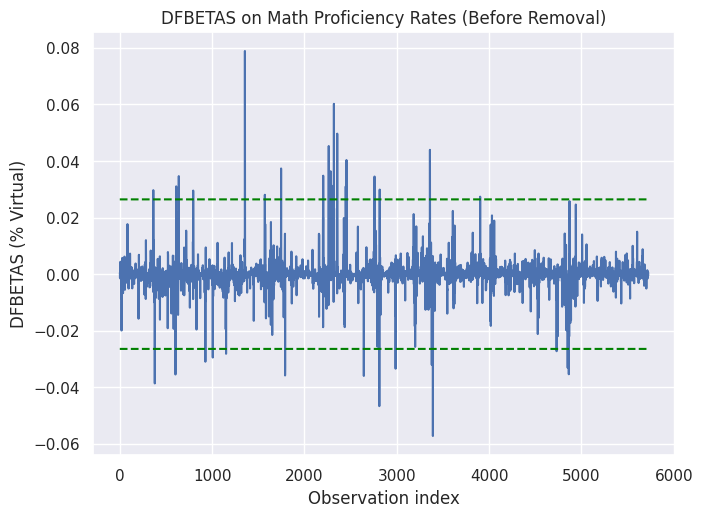

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_virtualper_influence.csv').mathpass_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Virtual)")
plt.title("DFBETAS on Math Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_vir_before.png")
files.download("math_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

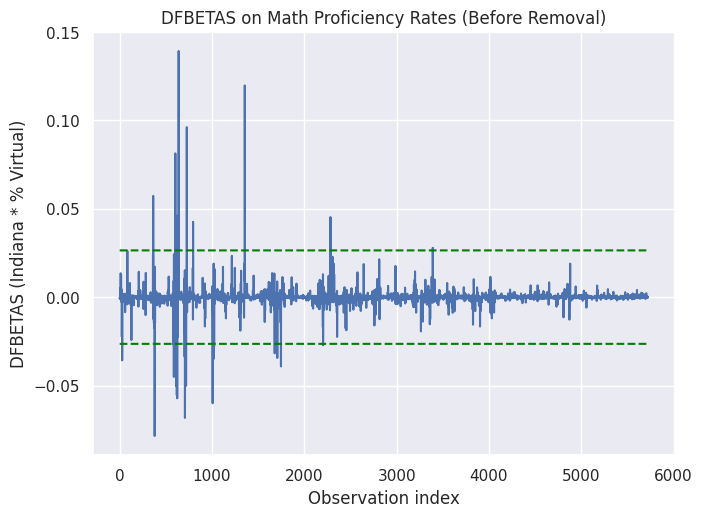

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_in_virtualper_influence.csv').mathpass_in_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Indiana * % Virtual)")
plt.title("DFBETAS on Math Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_in_vir_before.png")
files.download("math_in_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

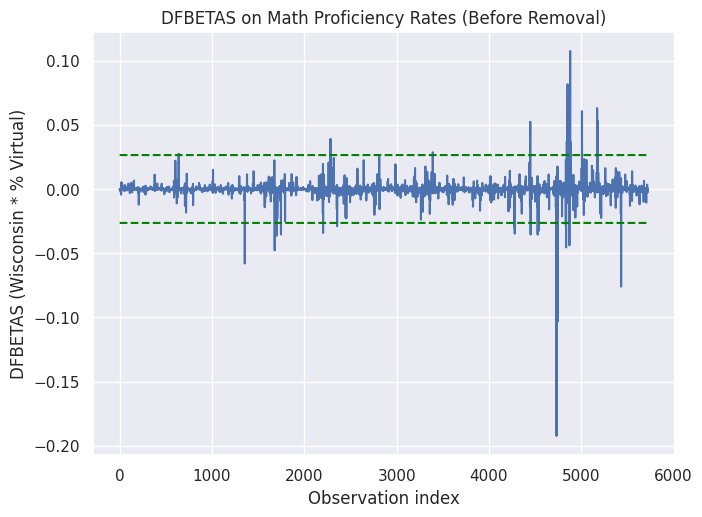

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_wi_virtualper_influence.csv').mathpass_wi_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Wisconsin * % Virtual)")
plt.title("DFBETAS on Math Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_wi_vir_before.png")
files.download("math_wi_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

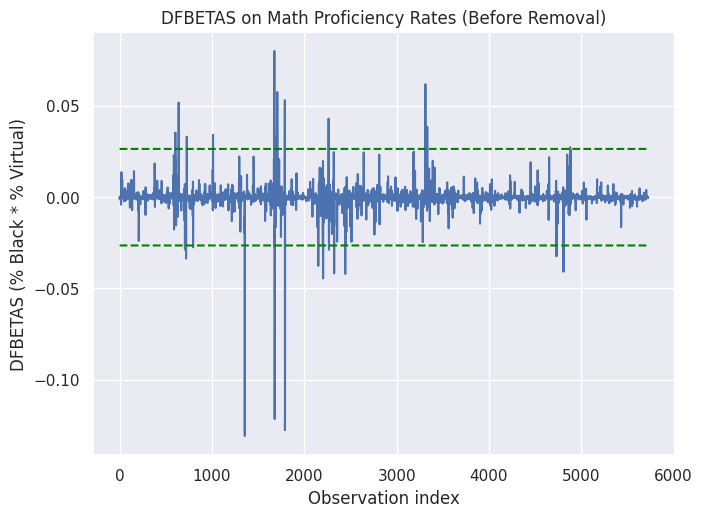

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_black_virtualper_influence.csv').mathpass_black_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Black * % Virtual)")
plt.title("DFBETAS on Math Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_black_vir_before.png")
files.download("math_black_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

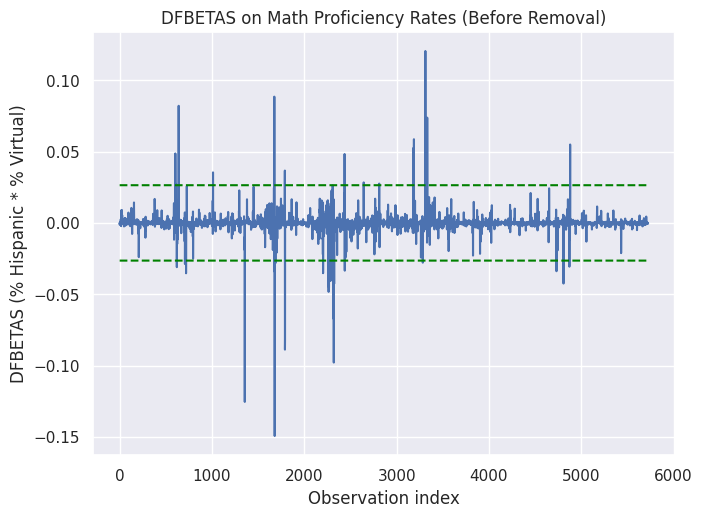

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_hispanic_virtualper_influence.csv').mathpass_hispanic_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hispanic * % Virtual)")
plt.title("DFBETAS on Math Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_his_vir_before.png")
files.download("math_his_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

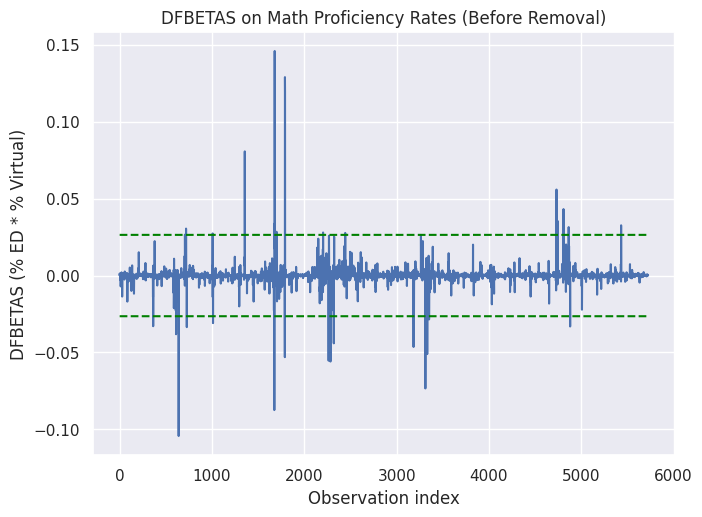

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_ed_virtualper_influence.csv').mathpass_ed_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% ED * % Virtual)")
plt.title("DFBETAS on Math Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_ed_vir_before.png")
files.download("math_ed_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

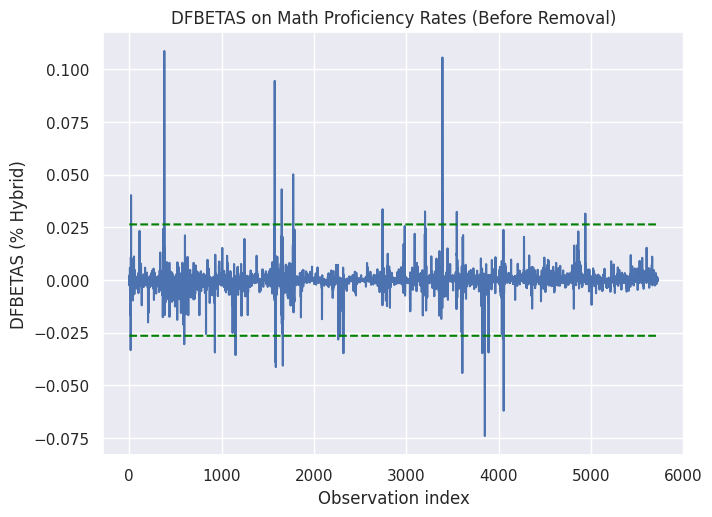

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_hybridper_influence.csv').mathpass_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hybrid)")
plt.title("DFBETAS on Math Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_hy_before.png")
files.download("math_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

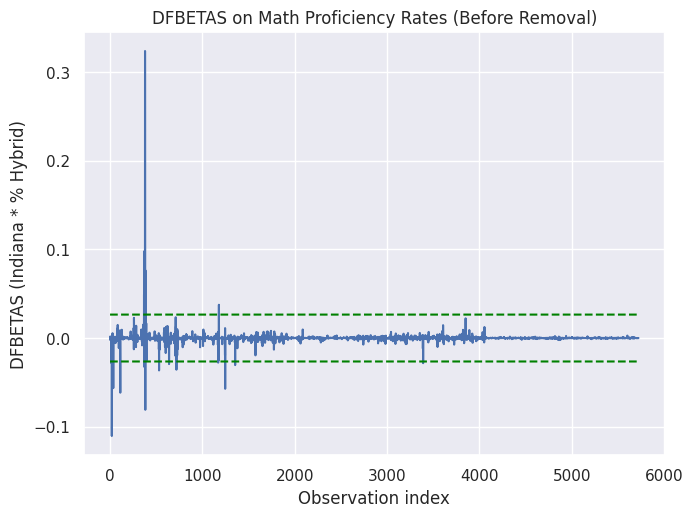

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_in_hybridper_influence.csv').mathpass_in_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Indiana * % Hybrid)")
plt.title("DFBETAS on Math Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_in_hy_before.png")
files.download("math_in_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

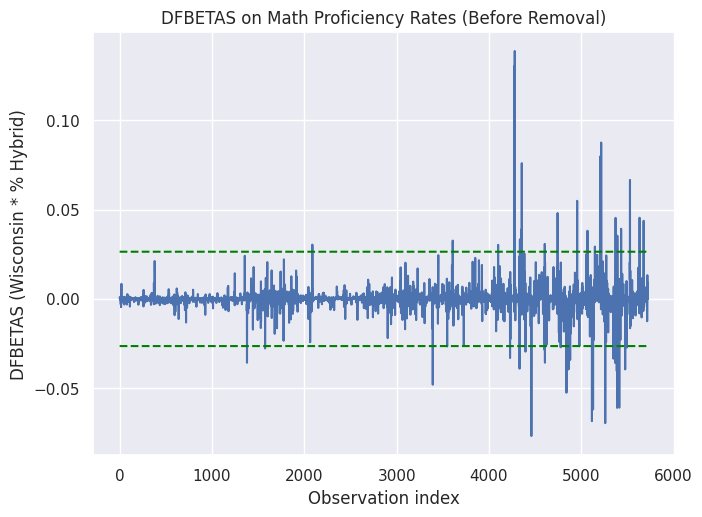

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_wi_hybridper_influence.csv').mathpass_wi_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Wisconsin * % Hybrid)")
plt.title("DFBETAS on Math Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_wi_hy_before.png")
files.download("math_wi_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

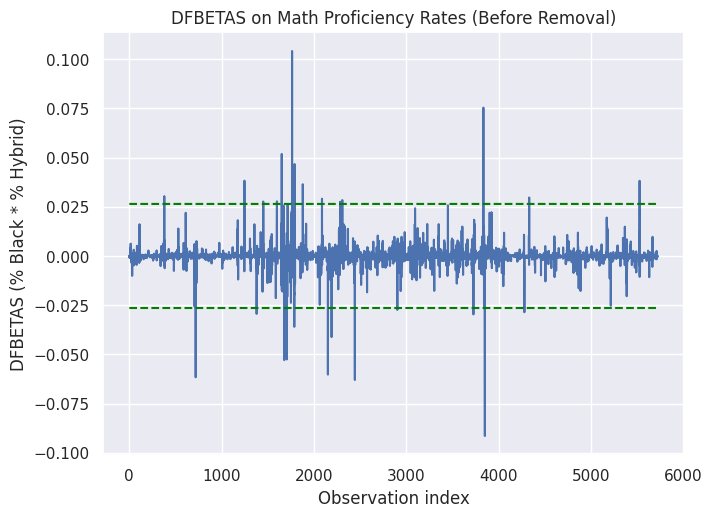

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_black_hybridper_influence.csv').mathpass_black_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Black * % Hybrid)")
plt.title("DFBETAS on Math Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_black_hy_before.png")
files.download("math_black_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

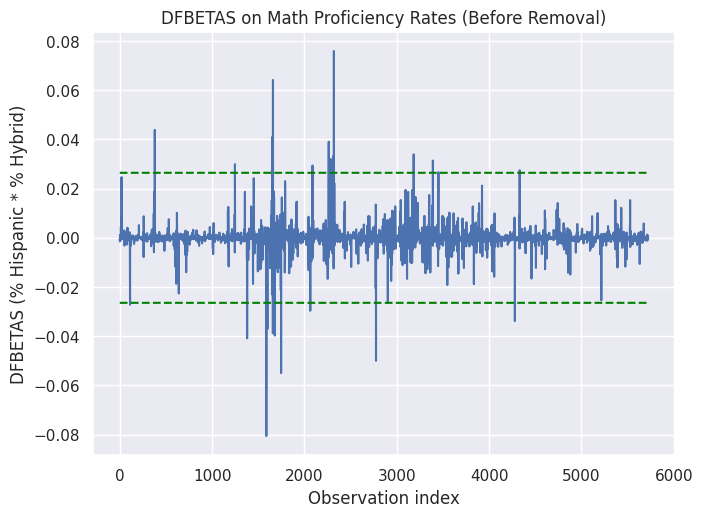

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_hispanic_hybridper_influence.csv').mathpass_hispanic_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hispanic * % Hybrid)")
plt.title("DFBETAS on Math Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_his_hy_before.png")
files.download("math_his_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

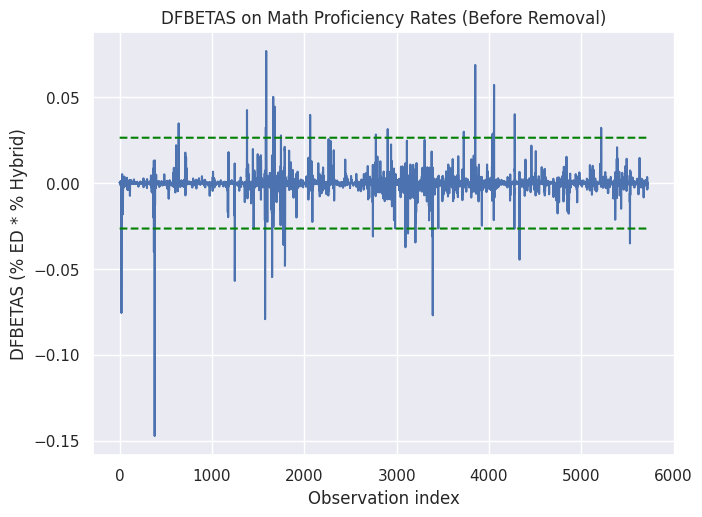

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_ed_hybridper_influence.csv').mathpass_ed_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% ED * % Hybrid)")
plt.title("DFBETAS on Math Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_ed_hy_before.png")
files.download("math_ed_hy_before.png")

# After Removal

In [ ]:
drop = pd.read_csv('math_drop.csv').math_drop.to_list()

in_math = pd.read_csv('new_indiana_mathpass.csv')
il = pd.read_csv('illinois_all.csv')
wi = pd.read_csv('wisconsin_all.csv')
data = pd.concat([in_math, il, wi]).loc[:, ['year', 'mergecode', 'state', 'totaltest', 'mathpass',
                                            'virtualper', 'hybridper', 'black', 'hispanic',
                                            'white', 'lowincome']]

data = data.loc[~data['mergecode'].isin(drop), :].reset_index().drop(columns = 'index')

dummy_variables = pd.get_dummies(data[['state']], drop_first = True, dtype = 'int')
data = pd.concat([data, dummy_variables], axis=1).drop(columns = ['state'])
data['in_virtual'] = data['state_indiana'] * data['virtualper']
data['wi_virtual'] = data['state_wisconsin'] * data['virtualper']
data['in_hybrid'] = data['state_indiana'] * data['hybridper']
data['wi_hybrid'] = data['state_wisconsin'] * data['hybridper']

data['year'] = pd.to_datetime(data['year'], format='%y')
data = data.drop(columns = ['state_indiana', 'state_wisconsin']).set_index(['mergecode', 'year'])

data['black_virtual'] = data['black'] * data['virtualper']
data['black_hybrid'] = data['black'] * data['hybridper']
data['hispanic_virtual'] = data['hispanic'] * data['virtualper']
data['hispanic_hybrid'] = data['hispanic'] * data['hybridper']
data['lowincome_virtual'] = data['lowincome'] * data['virtualper']
data['lowincome_hybrid'] = data['lowincome'] * data['hybridper']

In [ ]:
critical_val = 2 / np.sqrt(data.shape[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

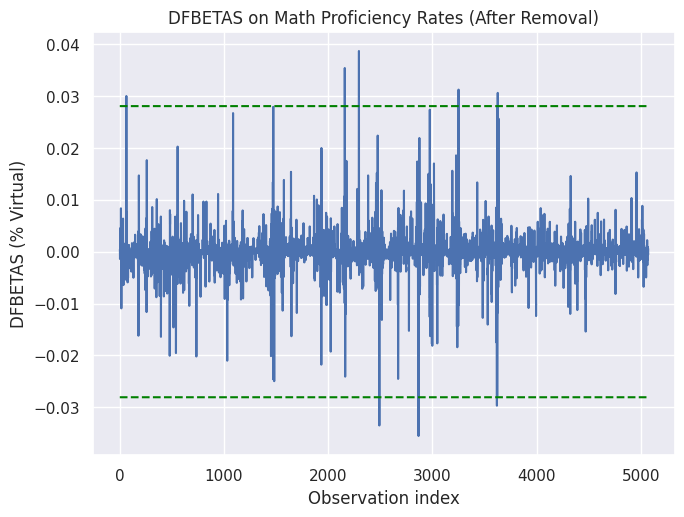

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_virtualper_influence.csv').mathpass_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Virtual)")
plt.title("DFBETAS on Math Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_vir_after.png")
files.download("math_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

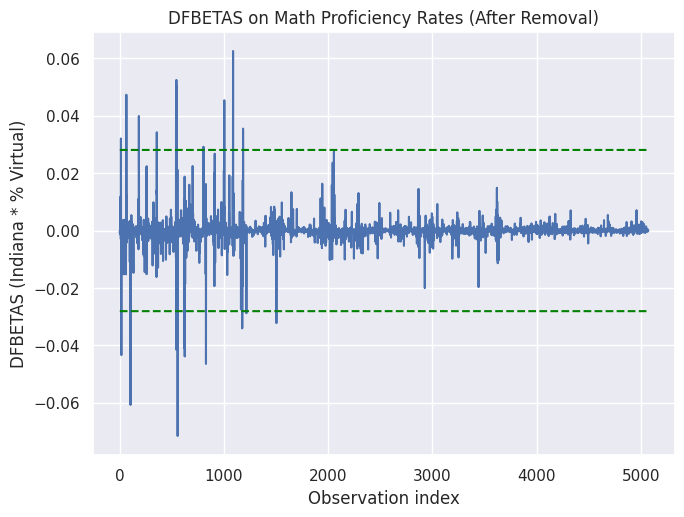

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_in_virtualper_influence.csv').mathpass_in_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Indiana * % Virtual)")
plt.title("DFBETAS on Math Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_in_vir_after.png")
files.download("math_in_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

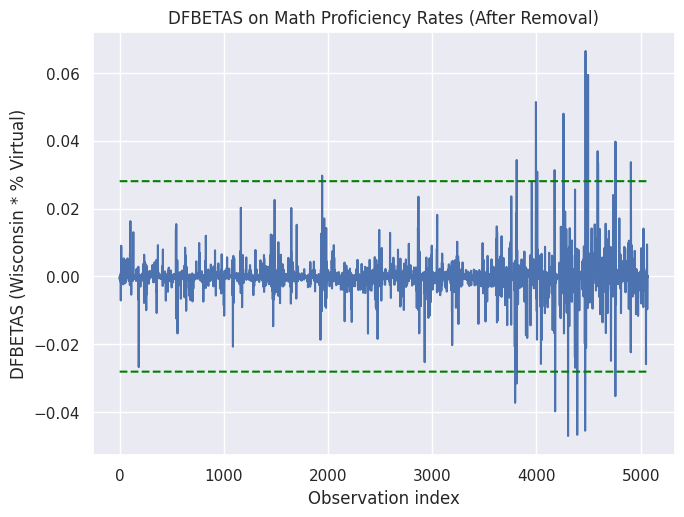

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_wi_virtualper_influence.csv').mathpass_wi_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Wisconsin * % Virtual)")
plt.title("DFBETAS on Math Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_wi_vir_after.png")
files.download("math_wi_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

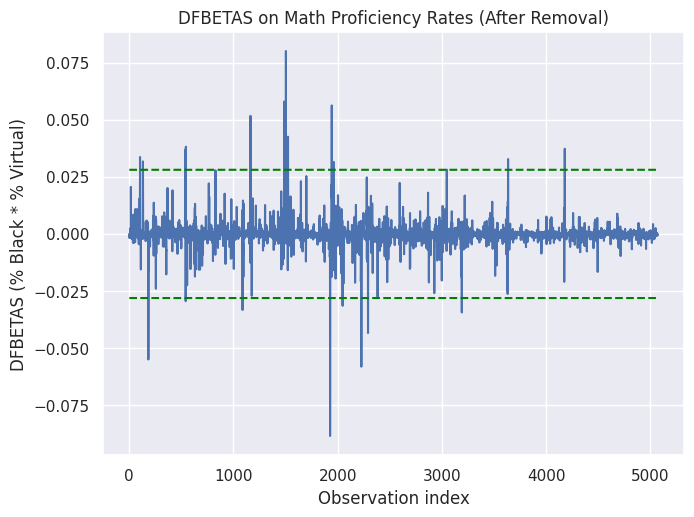

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_black_virtualper_influence.csv').mathpass_black_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Black * % Virtual)")
plt.title("DFBETAS on Math Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_black_vir_after.png")
files.download("math_black_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

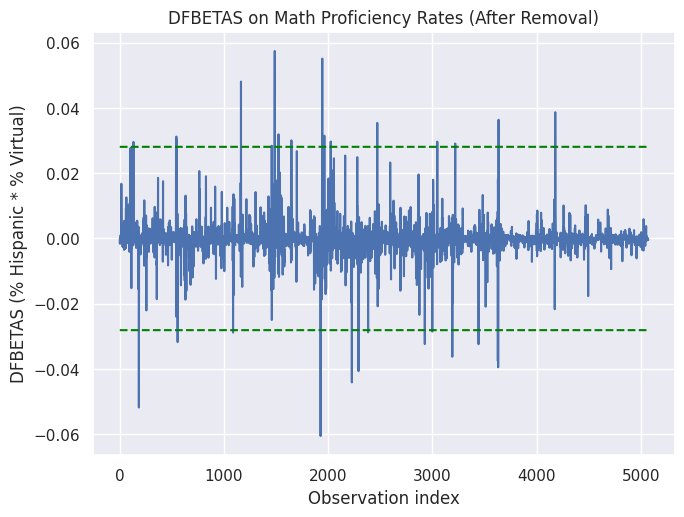

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_hispanic_virtualper_influence.csv').mathpass_hispanic_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hispanic * % Virtual)")
plt.title("DFBETAS on Math Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_his_vir_after.png")
files.download("math_his_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

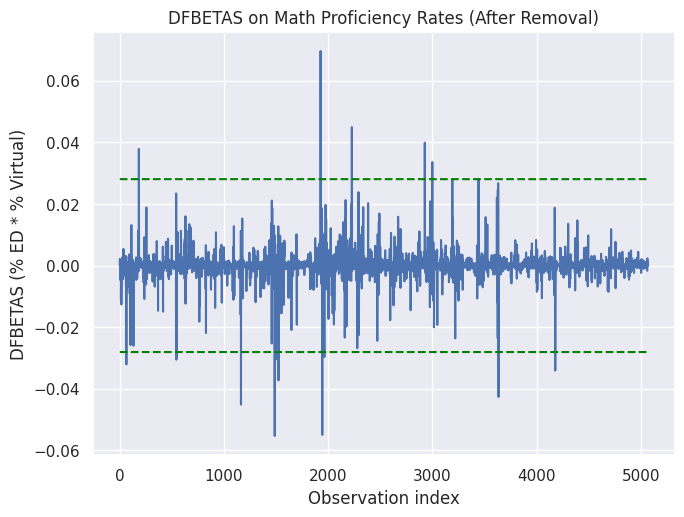

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_ed_virtualper_influence.csv').mathpass_ed_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% ED * % Virtual)")
plt.title("DFBETAS on Math Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_ed_vir_after.png")
files.download("math_ed_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

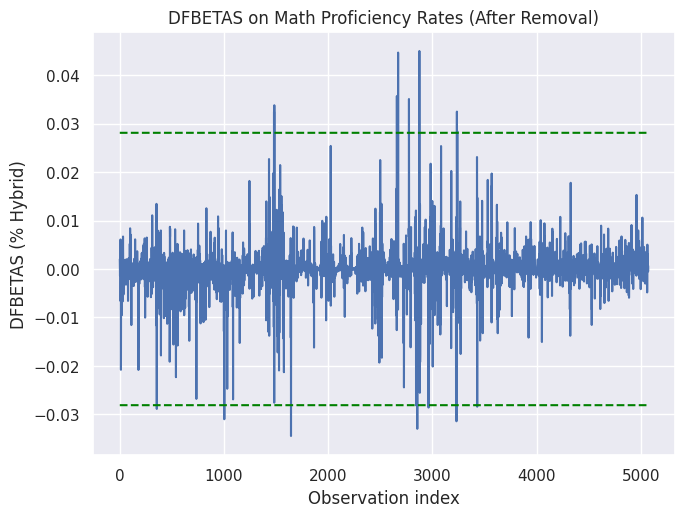

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_hybridper_influence.csv').mathpass_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hybrid)")
plt.title("DFBETAS on Math Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_hy_after.png")
files.download("math_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

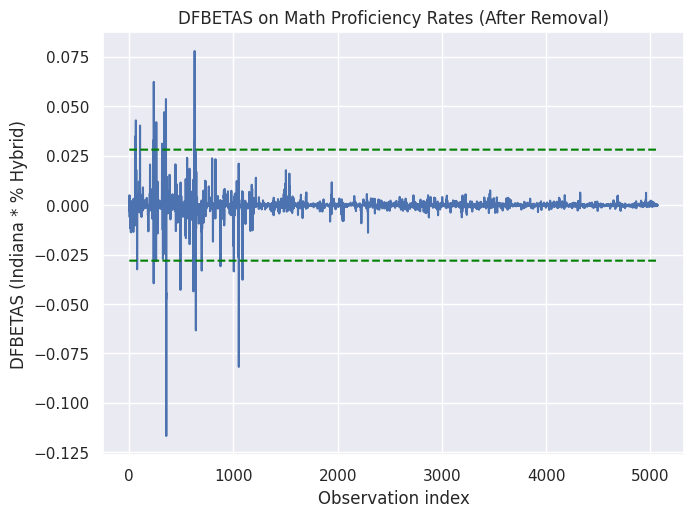

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_in_hybridper_influence.csv').mathpass_in_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Indiana * % Hybrid)")
plt.title("DFBETAS on Math Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_in_hy_after.png")
files.download("math_in_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

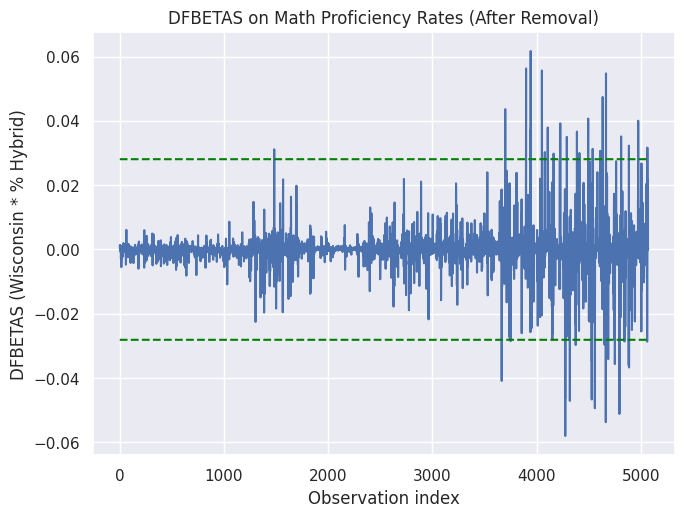

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_wi_hybridper_influence.csv').mathpass_wi_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Wisconsin * % Hybrid)")
plt.title("DFBETAS on Math Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_wi_hy_after.png")
files.download("math_wi_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

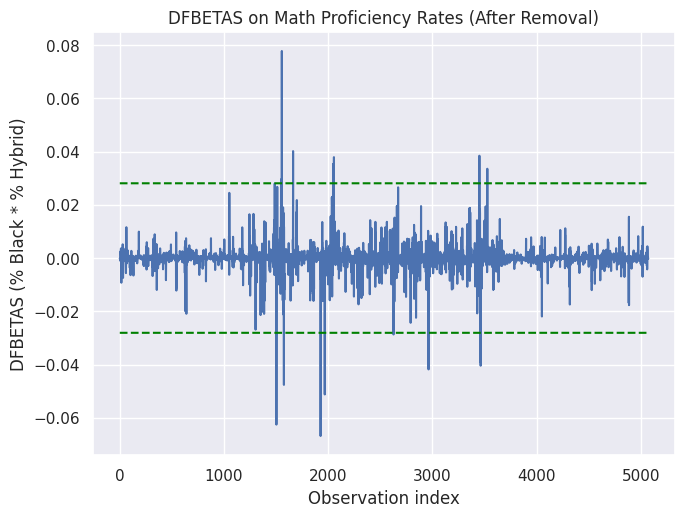

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_black_hybridper_influence.csv').mathpass_black_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Black * % Hybrid)")
plt.title("DFBETAS on Math Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_black_hy_after.png")
files.download("math_black_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

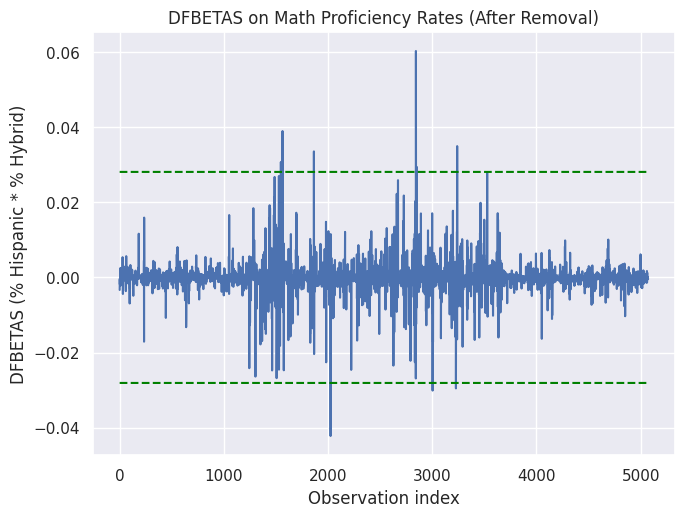

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_hispanic_hybridper_influence.csv').mathpass_hispanic_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hispanic * % Hybrid)")
plt.title("DFBETAS on Math Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_his_hy_after.png")
files.download("math_his_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

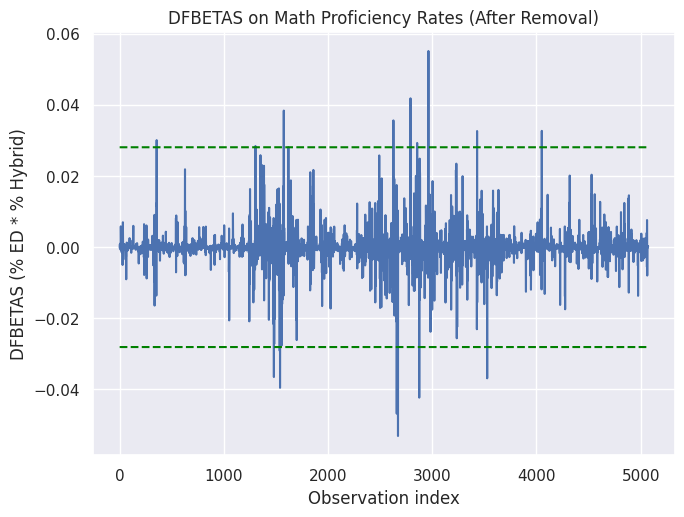

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('mathpass_ed_hybridper_influence.csv').mathpass_ed_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% ED * % Hybrid)")
plt.title("DFBETAS on Math Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("math_ed_hy_after.png")
files.download("math_ed_hy_after.png")

# ELA Proficiency Rates

# Before Removal

In [ ]:
in_ela = pd.read_csv('new_indiana_elapass.csv')
il = pd.read_csv('illinois_all.csv')
wi = pd.read_csv('wisconsin_all.csv')
data = pd.concat([in_ela, il, wi]).loc[:, ['year', 'mergecode', 'state', 'totaltest', 'mathpass',
                                            'virtualper', 'hybridper', 'black', 'hispanic',
                                            'white', 'lowincome']].reset_index().drop(columns = 'index')

dummy_variables = pd.get_dummies(data[['state']], drop_first = True, dtype = 'int')
data = pd.concat([data, dummy_variables], axis=1).drop(columns = ['state'])
data['in_virtual'] = data['state_indiana'] * data['virtualper']
data['wi_virtual'] = data['state_wisconsin'] * data['virtualper']
data['in_hybrid'] = data['state_indiana'] * data['hybridper']
data['wi_hybrid'] = data['state_wisconsin'] * data['hybridper']

data['year'] = pd.to_datetime(data['year'], format='%y')
data = data.drop(columns = ['state_indiana', 'state_wisconsin']).set_index(['mergecode', 'year'])

data['black_virtual'] = data['black'] * data['virtualper']
data['black_hybrid'] = data['black'] * data['hybridper']
data['hispanic_virtual'] = data['hispanic'] * data['virtualper']
data['hispanic_hybrid'] = data['hispanic'] * data['hybridper']
data['lowincome_virtual'] = data['lowincome'] * data['virtualper']
data['lowincome_hybrid'] = data['lowincome'] * data['hybridper']

In [ ]:
critical_val = 2 / np.sqrt(data.shape[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

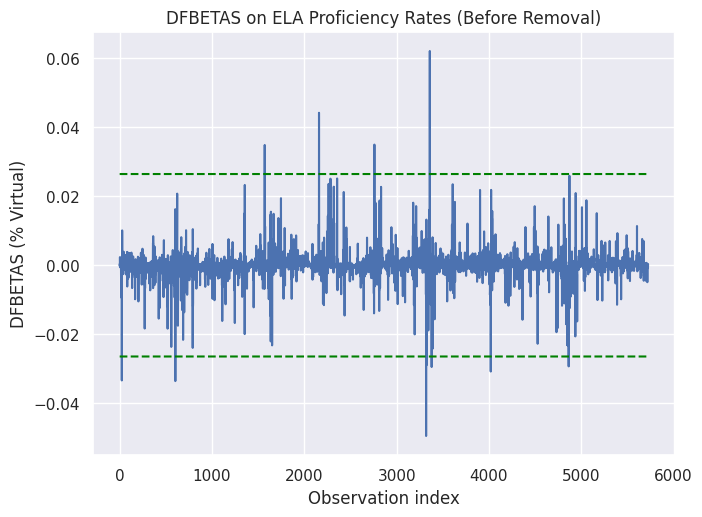

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_virtualper_influence.csv').elapass_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Virtual)")
plt.title("DFBETAS on ELA Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_vir_before.png")
files.download("ela_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

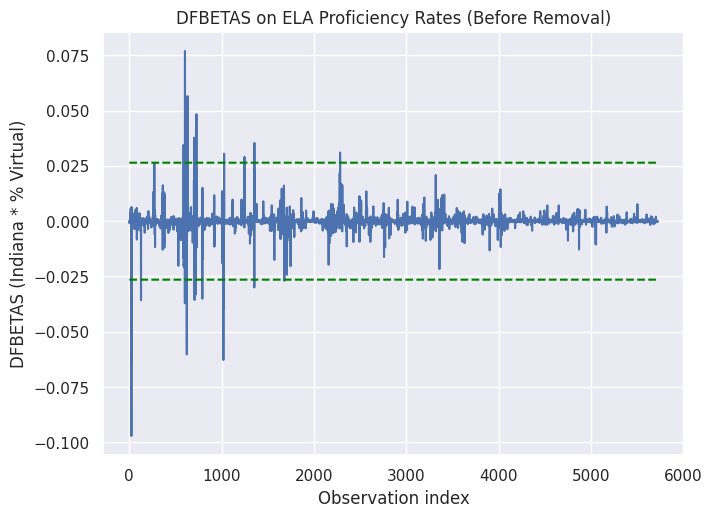

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_in_virtualper_influence.csv').elapass_in_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Indiana * % Virtual)")
plt.title("DFBETAS on ELA Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_in_vir_before.png")
files.download("ela_in_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

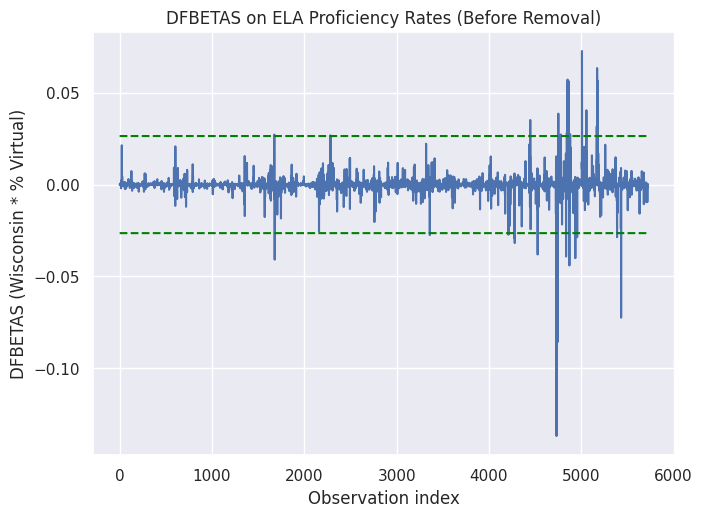

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_wi_virtualper_influence.csv').elapass_wi_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Wisconsin * % Virtual)")
plt.title("DFBETAS on ELA Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_wi_vir_before.png")
files.download("ela_wi_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

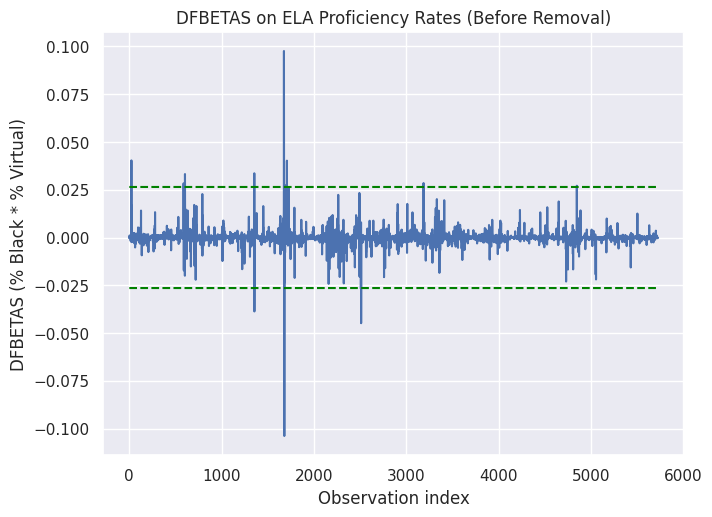

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_black_virtualper_influence.csv').elapass_black_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Black * % Virtual)")
plt.title("DFBETAS on ELA Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_black_vir_before.png")
files.download("ela_black_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

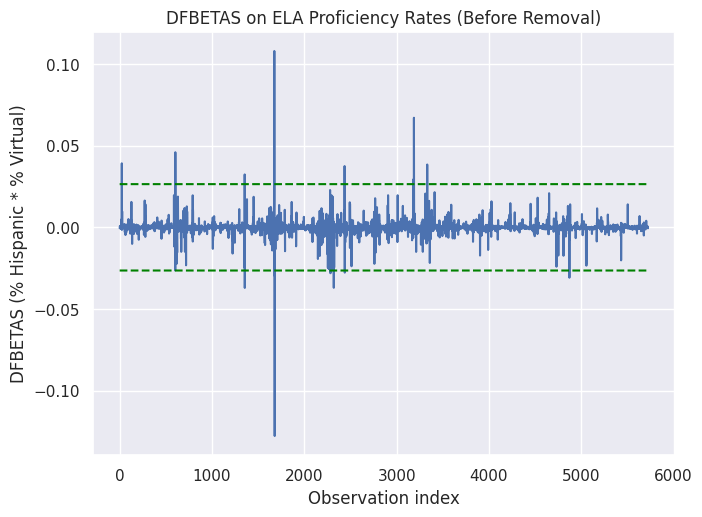

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_hispanic_virtualper_influence.csv').elapass_hispanic_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hispanic * % Virtual)")
plt.title("DFBETAS on ELA Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_his_vir_before.png")
files.download("ela_his_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

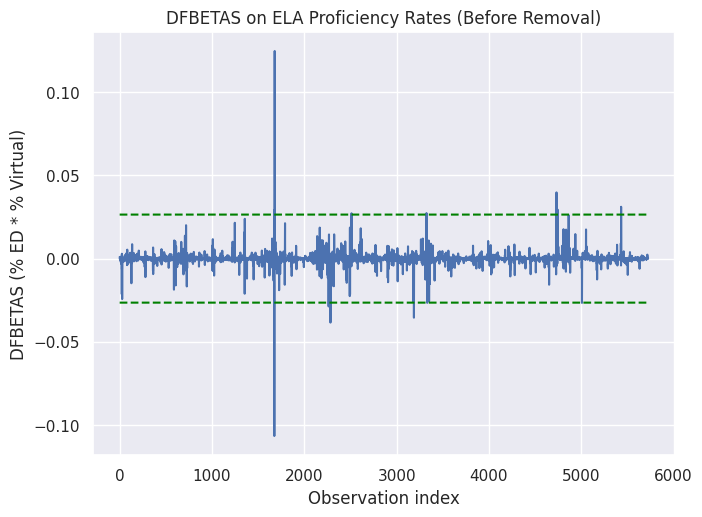

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_ed_virtualper_influence.csv').elapass_ed_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% ED * % Virtual)")
plt.title("DFBETAS on ELA Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_ed_vir_before.png")
files.download("ela_ed_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

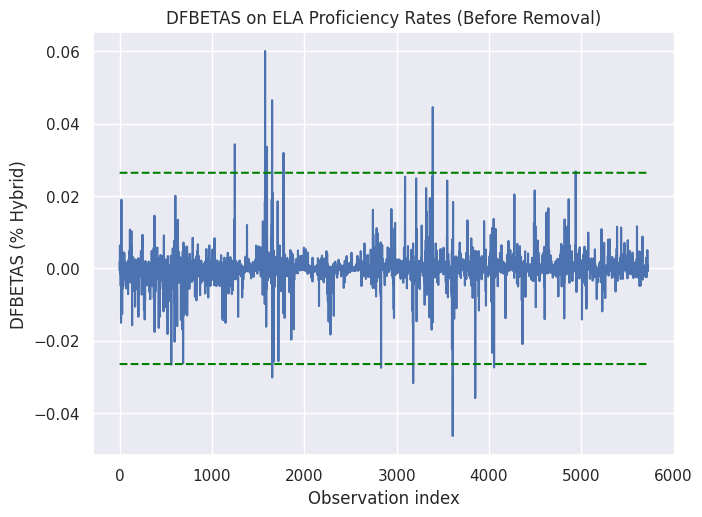

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_hybridper_influence.csv').elapass_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hybrid)")
plt.title("DFBETAS on ELA Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_hy_before.png")
files.download("ela_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

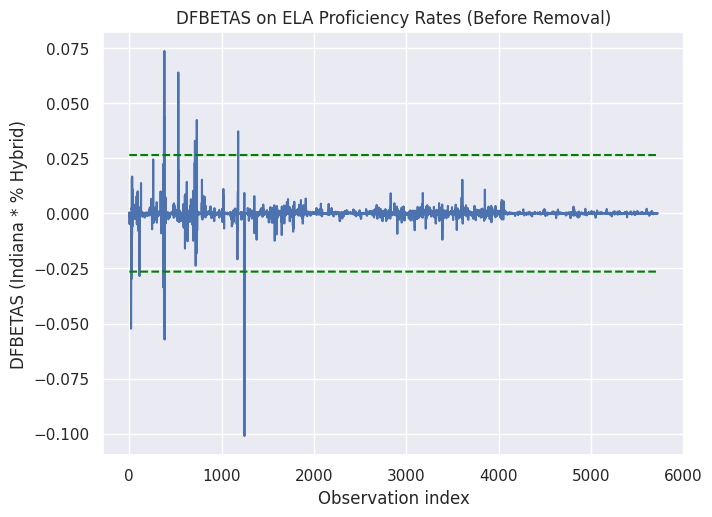

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_in_hybridper_influence.csv').elapass_in_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Indiana * % Hybrid)")
plt.title("DFBETAS on ELA Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_in_hy_before.png")
files.download("ela_in_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

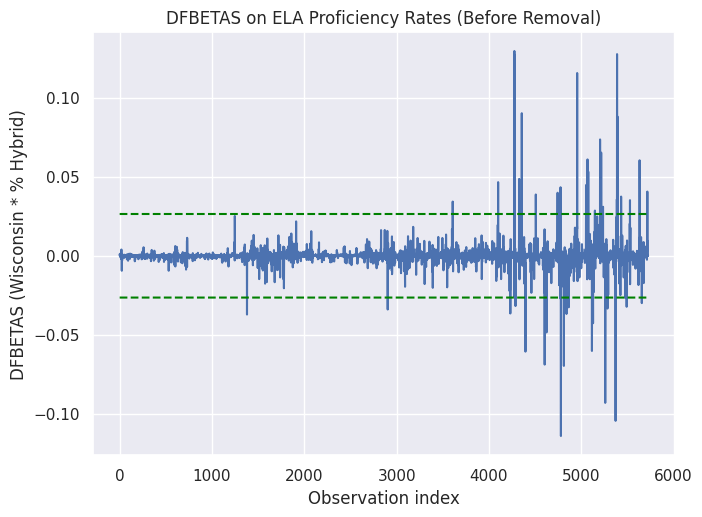

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_wi_hybridper_influence.csv').wi_elapass_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Wisconsin * % Hybrid)")
plt.title("DFBETAS on ELA Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_wi_hy_before.png")
files.download("ela_wi_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

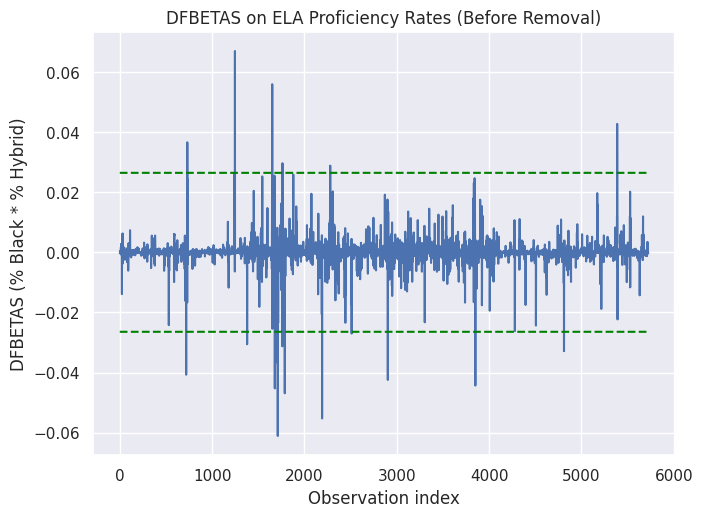

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_black_hybridper_influence.csv').black_elapass_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Black * % Hybrid)")
plt.title("DFBETAS on ELA Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_black_hy_before.png")
files.download("ela_black_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

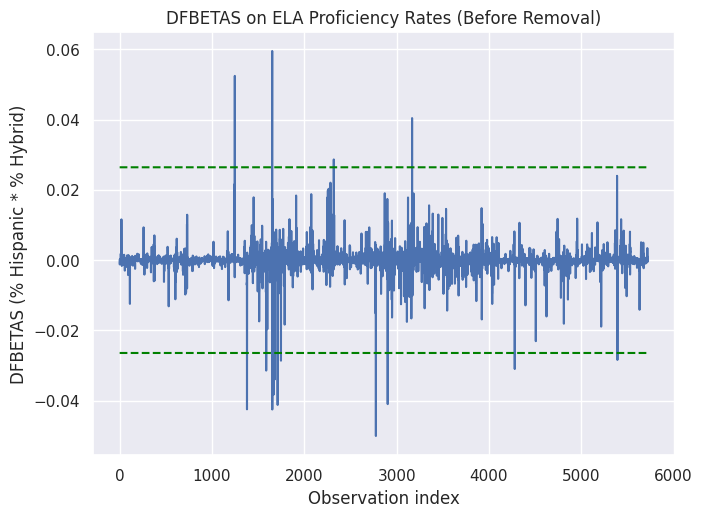

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_hispanic_hybridper_influence.csv').hispanic_elapass_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hispanic * % Hybrid)")
plt.title("DFBETAS on ELA Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_his_hy_before.png")
files.download("ela_his_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

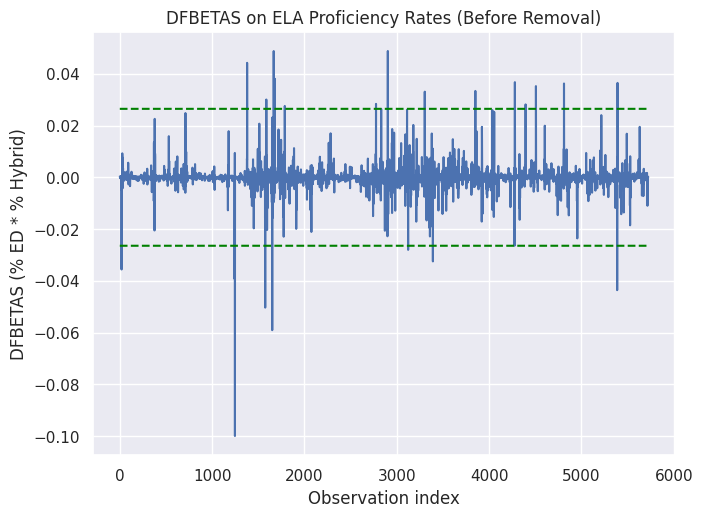

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_ed_hybridper_influence.csv').ed_elapass_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% ED * % Hybrid)")
plt.title("DFBETAS on ELA Proficiency Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_ed_hy_before.png")
files.download("ela_ed_hy_before.png")

# After Removal

In [ ]:
drop = pd.read_csv('ela_inf_remove.csv').ela_drop.to_list()

in_ela = pd.read_csv('new_indiana_elapass.csv')
il = pd.read_csv('illinois_all.csv')
wi = pd.read_csv('wisconsin_all.csv')
data = pd.concat([in_ela, il, wi]).loc[:, ['year', 'mergecode', 'state', 'totaltest', 'mathpass',
                                            'virtualper', 'hybridper', 'black', 'hispanic',
                                            'white', 'lowincome']].reset_index().drop(columns = 'index')

data = data.loc[~data['mergecode'].isin(drop), :].reset_index().drop(columns = 'index')

dummy_variables = pd.get_dummies(data[['state']], drop_first = True, dtype = 'int')
data = pd.concat([data, dummy_variables], axis=1).drop(columns = ['state'])
data['in_virtual'] = data['state_indiana'] * data['virtualper']
data['wi_virtual'] = data['state_wisconsin'] * data['virtualper']
data['in_hybrid'] = data['state_indiana'] * data['hybridper']
data['wi_hybrid'] = data['state_wisconsin'] * data['hybridper']

data['year'] = pd.to_datetime(data['year'], format='%y')
data = data.drop(columns = ['state_indiana', 'state_wisconsin']).set_index(['mergecode', 'year'])

data['black_virtual'] = data['black'] * data['virtualper']
data['black_hybrid'] = data['black'] * data['hybridper']
data['hispanic_virtual'] = data['hispanic'] * data['virtualper']
data['hispanic_hybrid'] = data['hispanic'] * data['hybridper']
data['lowincome_virtual'] = data['lowincome'] * data['virtualper']
data['lowincome_hybrid'] = data['lowincome'] * data['hybridper']

In [ ]:
critical_val = 2 / np.sqrt(data.shape[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

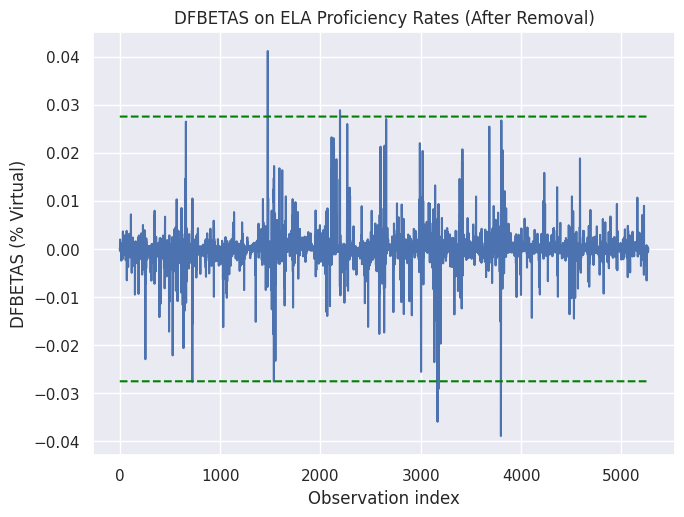

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_virtualper_influence.csv').elapass_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Virtual)")
plt.title("DFBETAS on ELA Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_vir_after.png")
files.download("ela_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

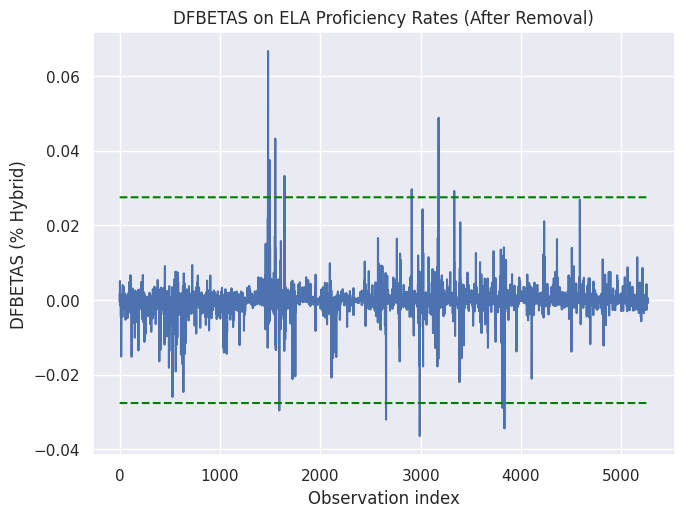

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_hybridper_influence.csv').elapass_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hybrid)")
plt.title("DFBETAS on ELA Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_hy_after.png")
files.download("ela_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

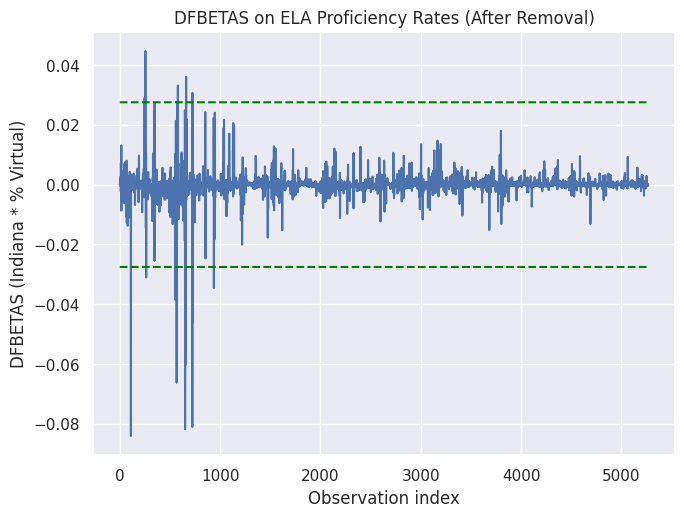

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_in_virtualper_influence.csv').elapass_in_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Indiana * % Virtual)")
plt.title("DFBETAS on ELA Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_in_vir_after.png")
files.download("ela_in_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

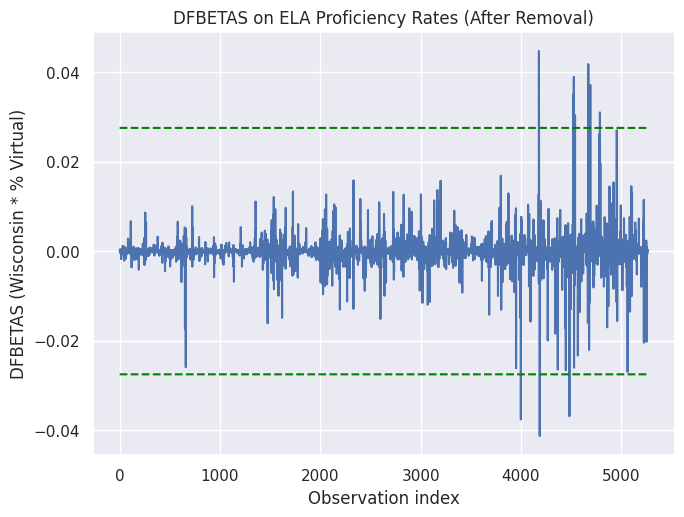

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_wi_virtualper_influence.csv').elapass_wi_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Wisconsin * % Virtual)")
plt.title("DFBETAS on ELA Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_wi_vir_after.png")
files.download("ela_wi_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

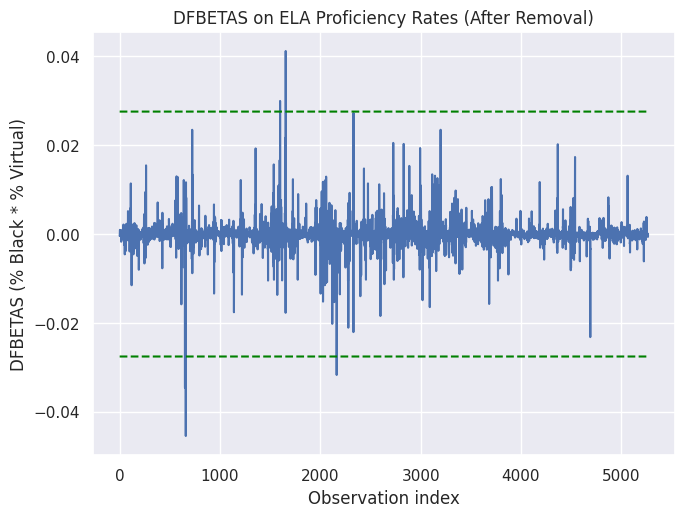

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_black_virtualper_influence.csv').elapass_black_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Black * % Virtual)")
plt.title("DFBETAS on ELA Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_black_vir_after.png")
files.download("ela_black_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

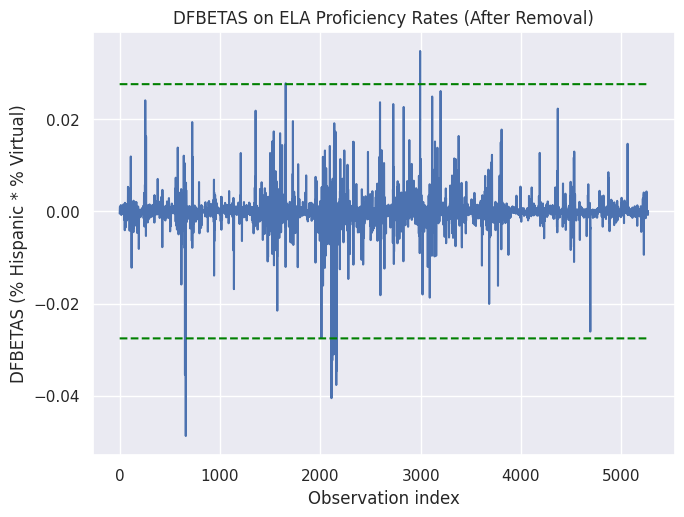

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_hispanic_virtualper_influence.csv').elapass_hispanic_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hispanic * % Virtual)")
plt.title("DFBETAS on ELA Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_his_vir_after.png")
files.download("ela_his_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

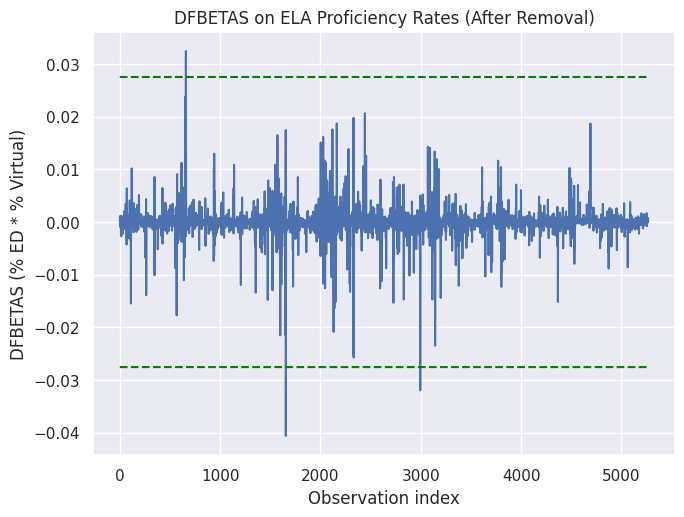

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_ed_virtualper_influence.csv').elapass_ed_virtualper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% ED * % Virtual)")
plt.title("DFBETAS on ELA Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_ed_vir_after.png")
files.download("ela_ed_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

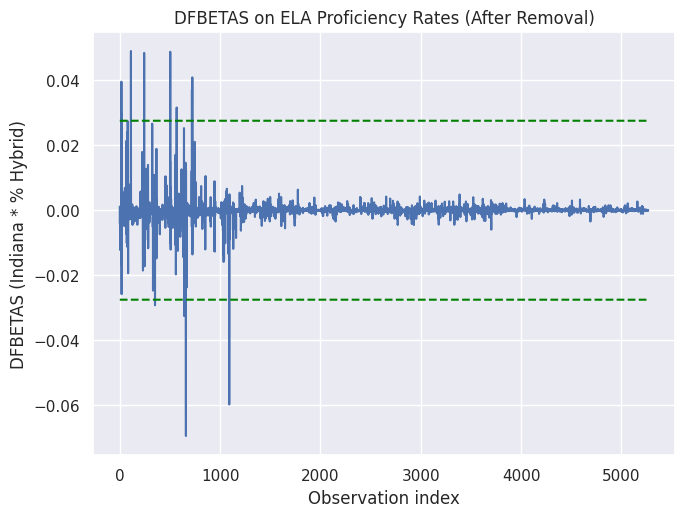

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_in_hybridper_influence.csv').elapass_in_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Indiana * % Hybrid)")
plt.title("DFBETAS on ELA Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_in_hy_after.png")
files.download("ela_in_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

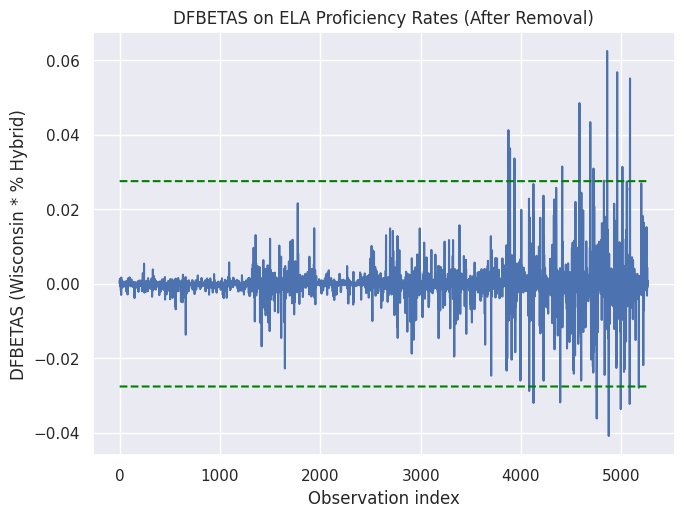

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_wi_hybridper_influence.csv').elapass_wi_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Wisconsin * % Hybrid)")
plt.title("DFBETAS on ELA Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_wi_hy_after.png")
files.download("ela_wi_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

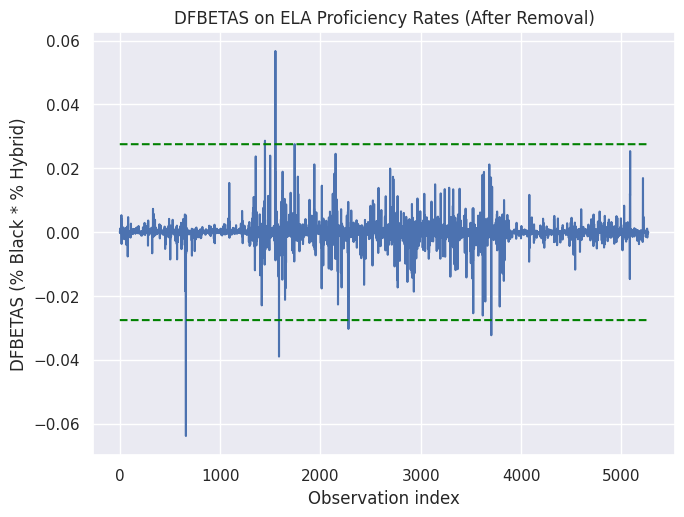

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_black_hybridper_influence.csv').elapass_black_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Black * % Hybrid)")
plt.title("DFBETAS on ELA Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_black_hy_after.png")
files.download("ela_black_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

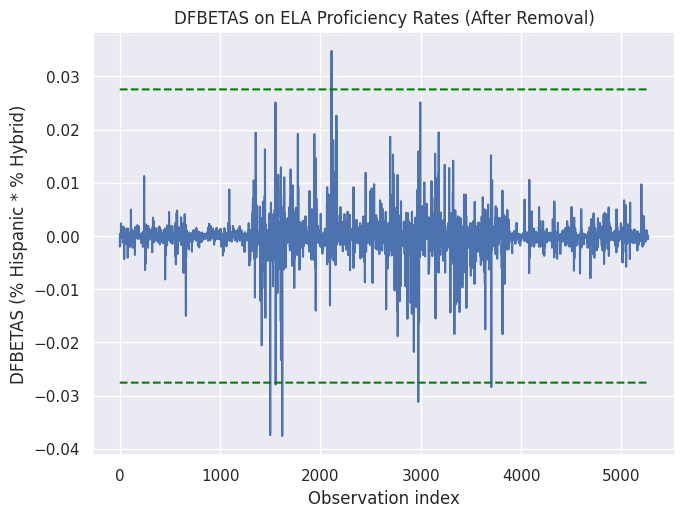

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_hispanic_hybridper_influence.csv').elapass_hispanic_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hispanic * % Hybrid)")
plt.title("DFBETAS on ELA Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_his_hy_after.png")
files.download("ela_his_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

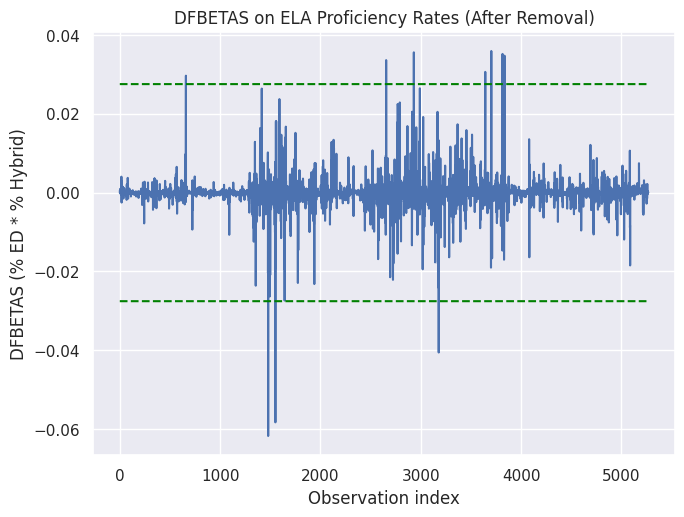

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('elapass_ed_hybridper_influence.csv').elapass_ed_hybridper_inf)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% ED * % Hybrid)")
plt.title("DFBETAS on ELA Proficiency Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("ela_ed_hy_after.png")
files.download("ela_ed_hy_after.png")

# Dropout Rates

# Before Removal

In [ ]:
az = pd.read_csv('arizona_dropout.csv')
co = pd.read_csv('colorado_dropout.csv')
ga = pd.read_csv('georgia_dropout.csv')
wi = pd.read_csv('wisconsin_all.csv')
data = pd.concat([az, co, ga, wi]).loc[:, ['year', 'mergecode', 'state', 'totalenroll', 'droprate',
                                            'virtualper', 'hybridper', 'black', 'hispanic',
                                            'white', 'lowincome']].reset_index().drop(columns = 'index')

dummy_variables = pd.get_dummies(data[['state']], drop_first = True, dtype = 'int')
data = pd.concat([data, dummy_variables], axis=1).drop(columns = ['state'])
data['co_virtual'] = data['state_colorado'] * data['virtualper']
data['ga_virtual'] = data['state_georgia'] * data['virtualper']
data['wi_virtual'] = data['state_wisconsin'] * data['virtualper']
data['co_hybrid'] = data['state_colorado'] * data['hybridper']
data['ga_hybrid'] = data['state_georgia'] * data['hybridper']
data['wi_hybrid'] = data['state_wisconsin'] * data['hybridper']

data['year'] = pd.to_datetime(data['year'], format='%y')
data = data.drop(columns = ['state_colorado', 'state_georgia',
                            'state_wisconsin']).set_index(['mergecode', 'year'])

data['black_virtual'] = data['black'] * data['virtualper']
data['black_hybrid'] = data['black'] * data['hybridper']
data['hispanic_virtual'] = data['hispanic'] * data['virtualper']
data['hispanic_hybrid'] = data['hispanic'] * data['hybridper']
data['lowincome_virtual'] = data['lowincome'] * data['virtualper']
data['lowincome_hybrid'] = data['lowincome'] * data['hybridper']

critical_val = 2 / np.sqrt(data.shape[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

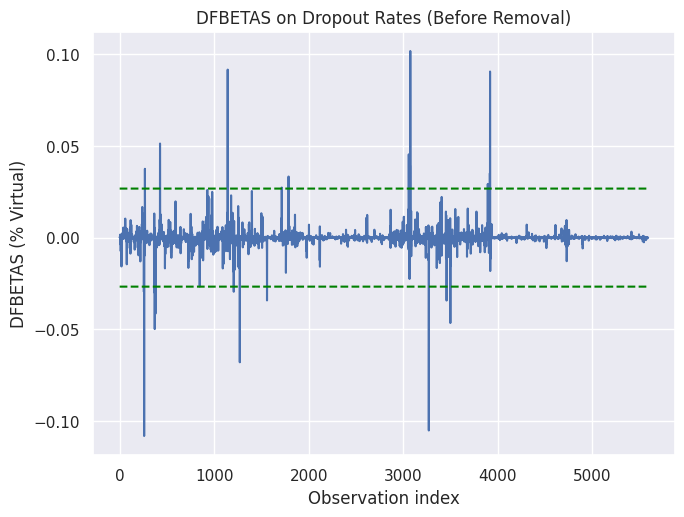

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_virtual.csv').drop_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Virtual)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_vir_before.png")
files.download("drop_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

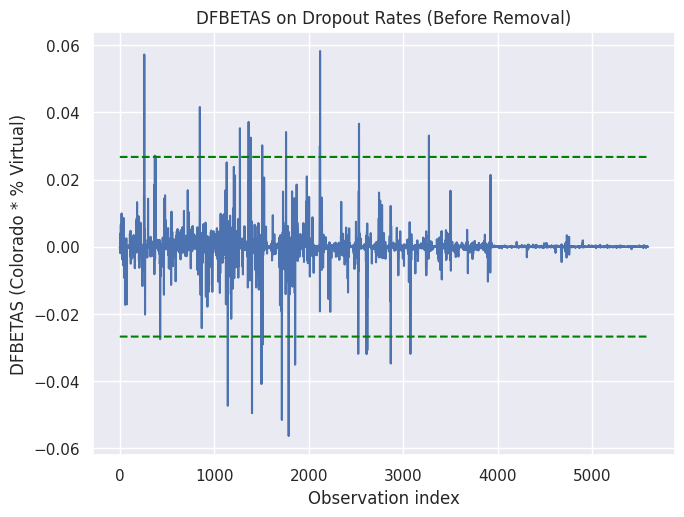

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_co_virtual.csv').drop_co_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Colorado * % Virtual)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_co_vir_before.png")
files.download("drop_co_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

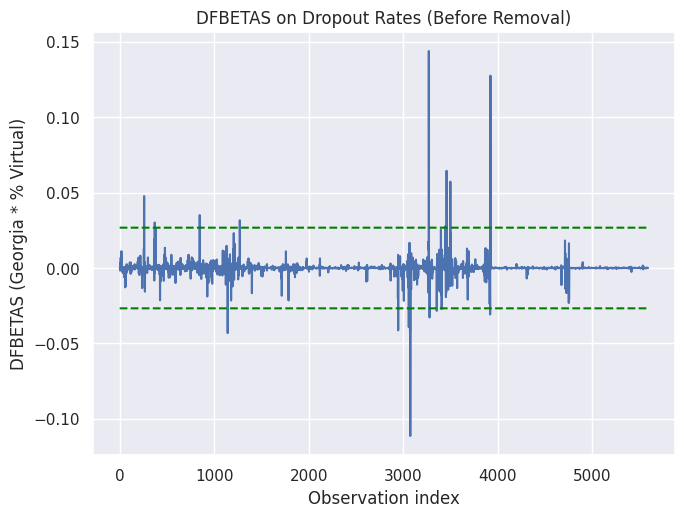

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_ga_virtual.csv').drop_ga_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Georgia * % Virtual)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_ga_vir_before.png")
files.download("drop_ga_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

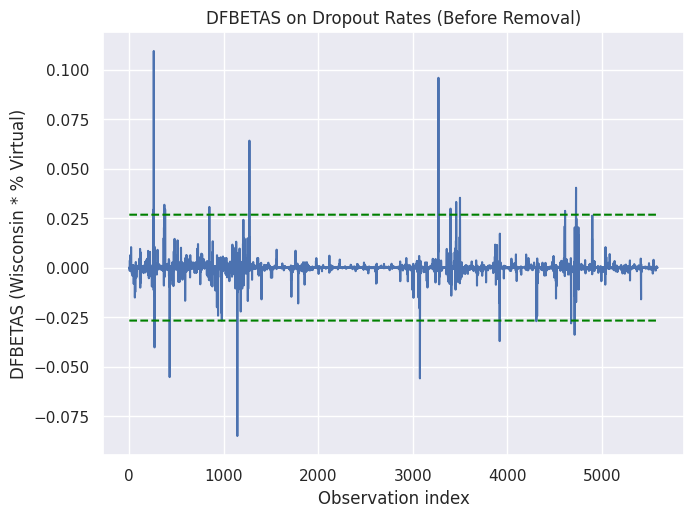

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_wi_virtual.csv').drop_wi_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Wisconsin * % Virtual)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_wi_vir_before.png")
files.download("drop_wi_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

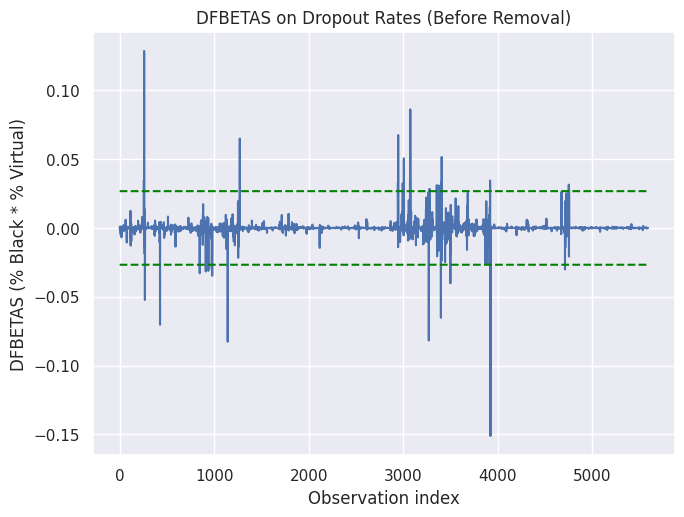

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_black_virtual.csv').drop_black_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Black * % Virtual)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_black_vir_before.png")
files.download("drop_black_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

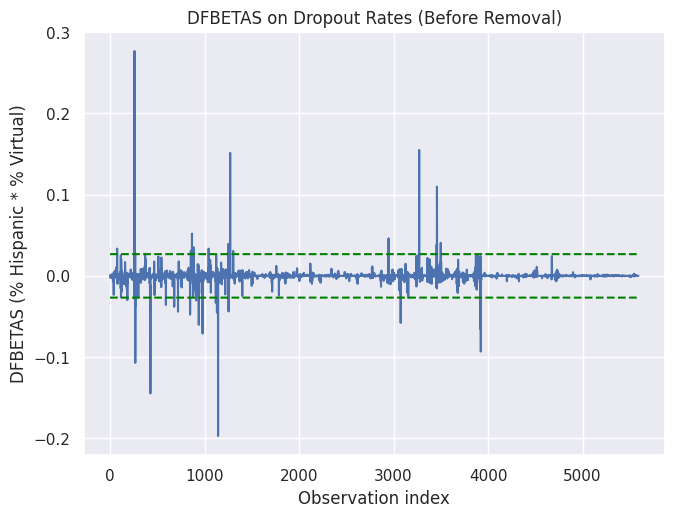

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_his_virtual.csv').drop_his_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hispanic * % Virtual)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_hipanic_vir_before.png")
files.download("drop_hipanic_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

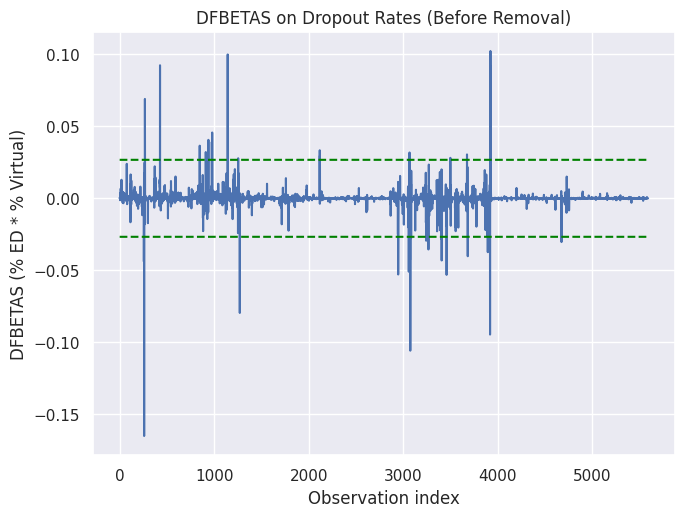

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_ed_virtual.csv').drop_ed_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% ED * % Virtual)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_ed_vir_before.png")
files.download("drop_ed_vir_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

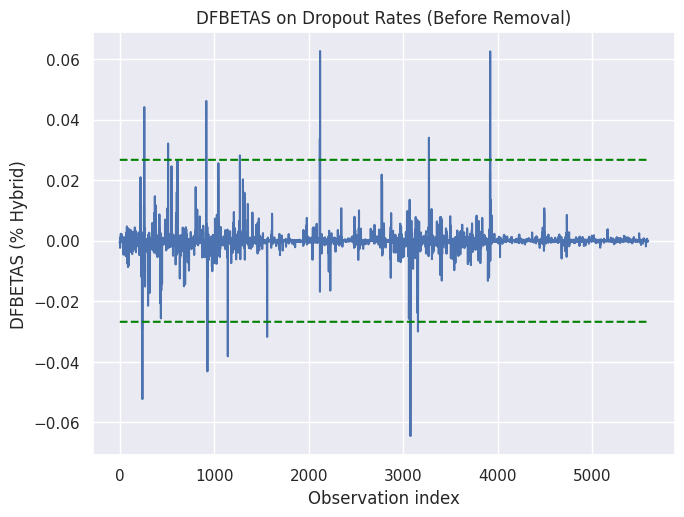

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_hybrid.csv').drop_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hybrid)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_hy_before.png")
files.download("drop_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

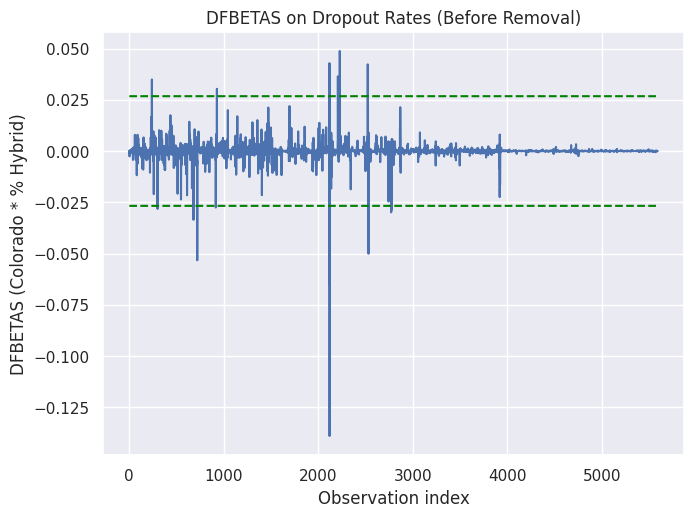

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_co_hybrid.csv').drop_co_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Colorado * % Hybrid)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_co_hy_before.png")
files.download("drop_co_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

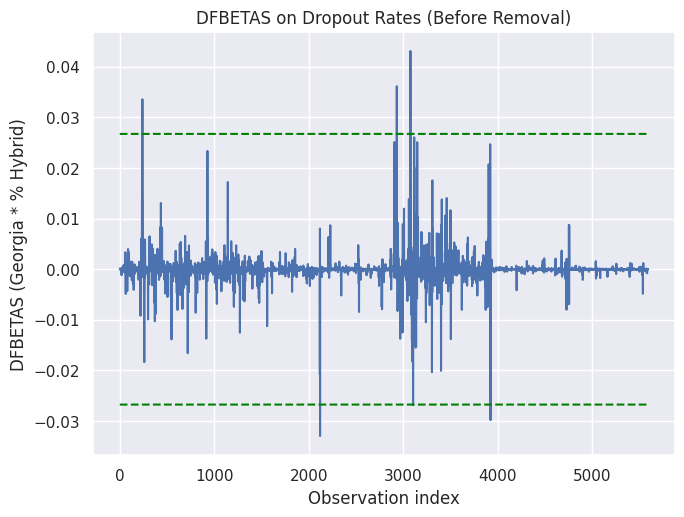

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_ga_hybrid.csv').drop_ga_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Georgia * % Hybrid)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_ga_hy_before.png")
files.download("drop_ga_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

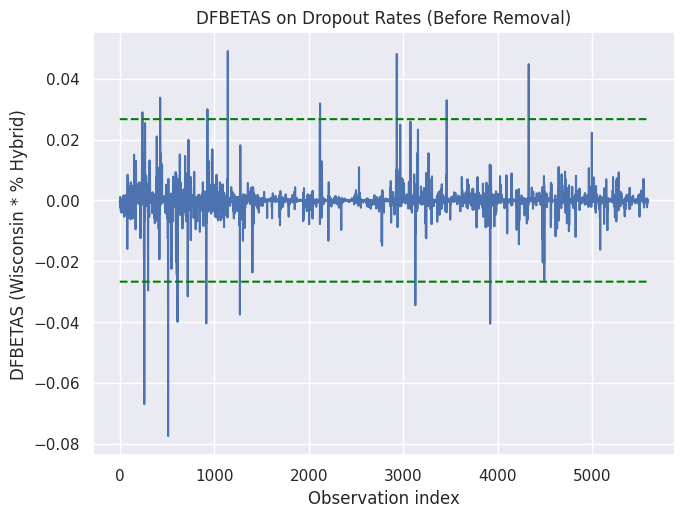

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_wi_hybrid.csv').drop_wi_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Wisconsin * % Hybrid)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_wi_hy_before.png")
files.download("drop_wi_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

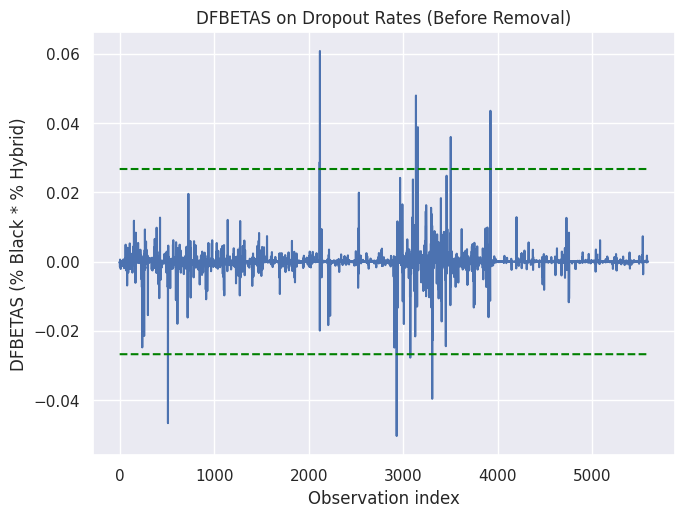

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_black_hybrid.csv').drop_black_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Black * % Hybrid)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_black_hy_before.png")
files.download("drop_black_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

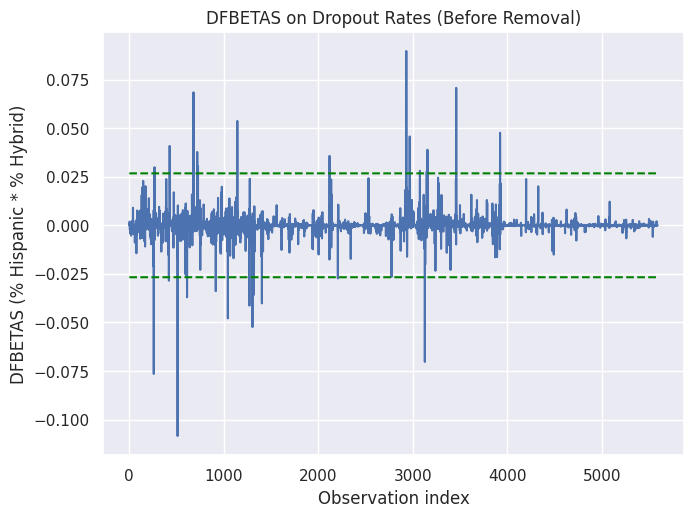

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_his_hybrid.csv').drop_his_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hispanic * % Hybrid)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_his_hy_before.png")
files.download("drop_his_hy_before.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

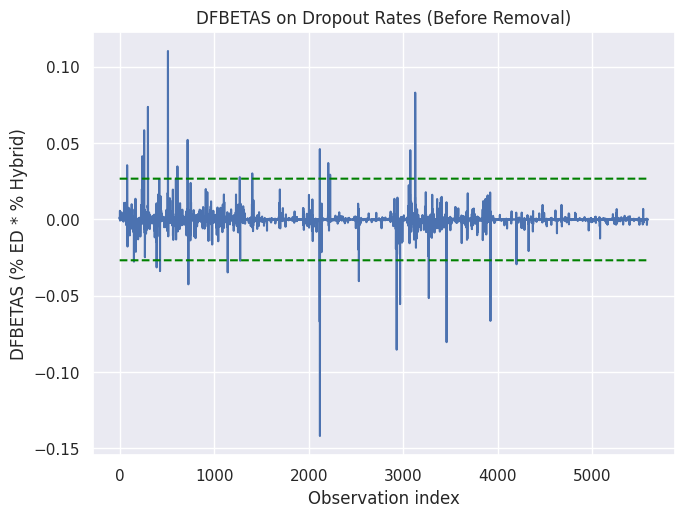

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_ed_hybrid.csv').drop_ed_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% ED * % Hybrid)")
plt.title("DFBETAS on Dropout Rates (Before Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_ed_hy_before.png")
files.download("drop_ed_hy_before.png")

# After Removal

In [ ]:
drop = pd.read_csv('drop_inf_remove.csv').drop_drop.to_list()

az = pd.read_csv('arizona_dropout.csv')
co = pd.read_csv('colorado_dropout.csv')
ga = pd.read_csv('georgia_dropout.csv')
wi = pd.read_csv('wisconsin_all.csv')
data = pd.concat([az, co, ga, wi]).loc[:, ['year', 'mergecode', 'state', 'totalenroll', 'droprate',
                                            'virtualper', 'hybridper', 'black', 'hispanic',
                                            'white', 'lowincome']]

data = data.loc[~data['mergecode'].isin(drop), :].reset_index().drop(columns = 'index')

dummy_variables = pd.get_dummies(data[['state']], drop_first = True, dtype = 'int')
data = pd.concat([data, dummy_variables], axis=1).drop(columns = ['state'])
data['co_virtual'] = data['state_colorado'] * data['virtualper']
data['ga_virtual'] = data['state_georgia'] * data['virtualper']
data['wi_virtual'] = data['state_wisconsin'] * data['virtualper']
data['co_hybrid'] = data['state_colorado'] * data['hybridper']
data['ga_hybrid'] = data['state_georgia'] * data['hybridper']
data['wi_hybrid'] = data['state_wisconsin'] * data['hybridper']

data['year'] = pd.to_datetime(data['year'], format='%y')
data = data.drop(columns = ['state_colorado', 'state_georgia',
                            'state_wisconsin']).set_index(['mergecode', 'year'])

data['black_virtual'] = data['black'] * data['virtualper']
data['black_hybrid'] = data['black'] * data['hybridper']
data['hispanic_virtual'] = data['hispanic'] * data['virtualper']
data['hispanic_hybrid'] = data['hispanic'] * data['hybridper']
data['lowincome_virtual'] = data['lowincome'] * data['virtualper']
data['lowincome_hybrid'] = data['lowincome'] * data['hybridper']

critical_val = 2 / np.sqrt(data.shape[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

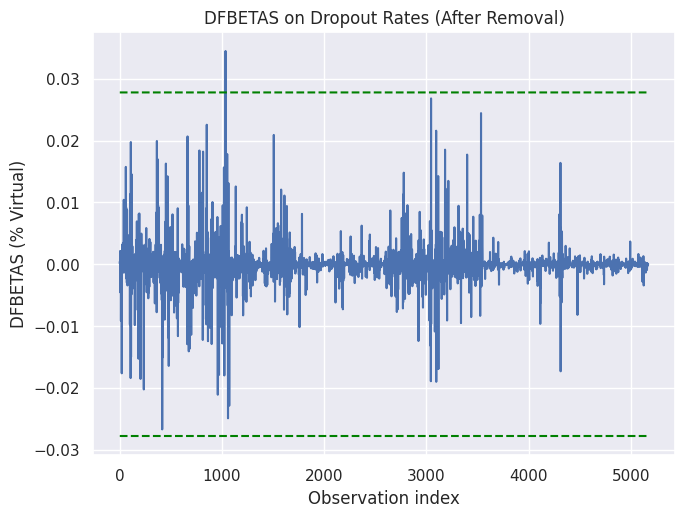

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_virtual.csv').drop_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Virtual)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_vir_after.png")
files.download("drop_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

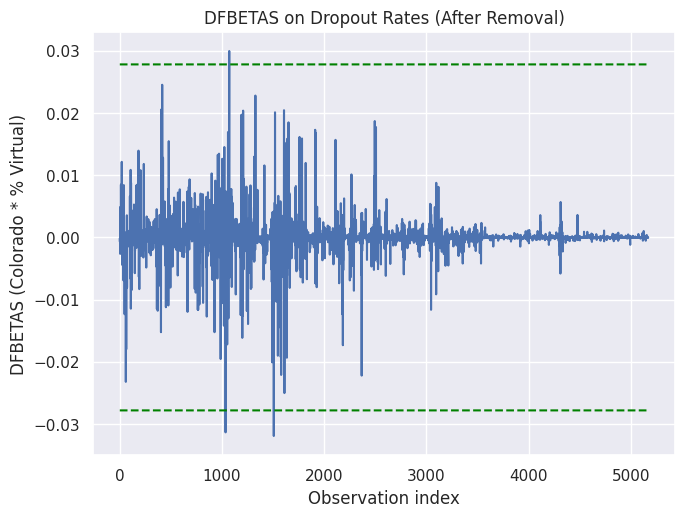

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_co_virtual.csv').drop_co_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Colorado * % Virtual)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_co_vir_after.png")
files.download("drop_co_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

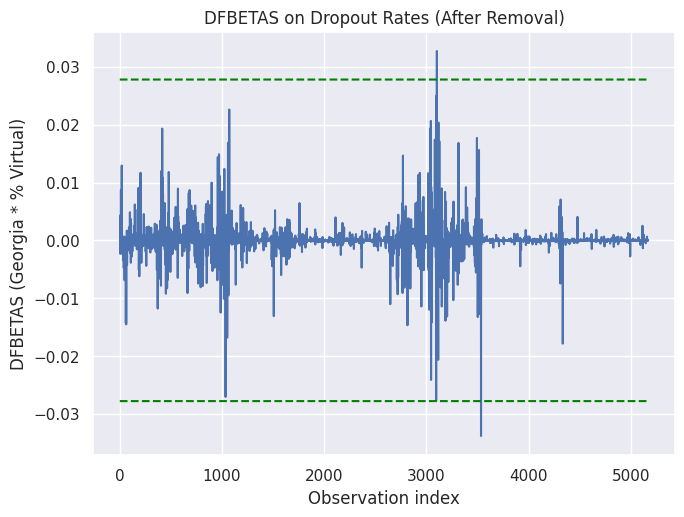

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_ga_virtual.csv').drop_ga_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Georgia * % Virtual)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_ga_vir_after.png")
files.download("drop_ga_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

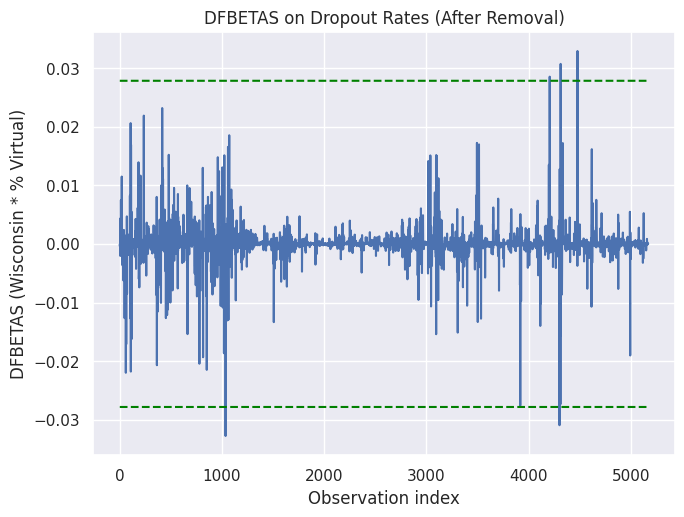

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_wi_virtual.csv').drop_wi_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Wisconsin * % Virtual)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_wi_vir_after.png")
files.download("drop_wi_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

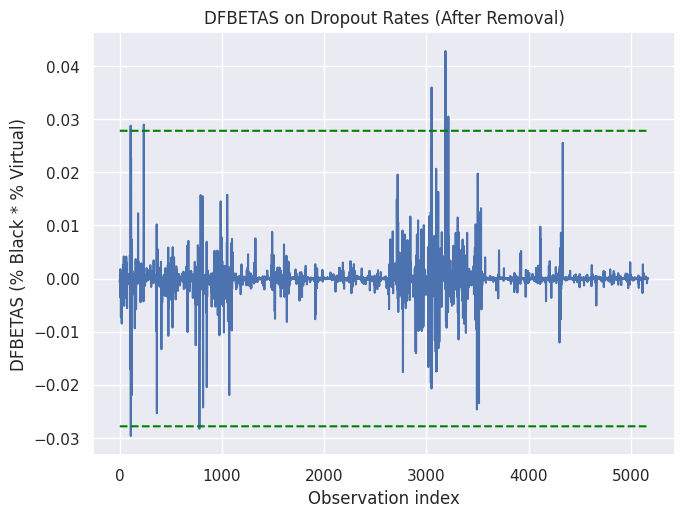

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_black_virtual.csv').drop_black_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Black * % Virtual)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_black_vir_after.png")
files.download("drop_black_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

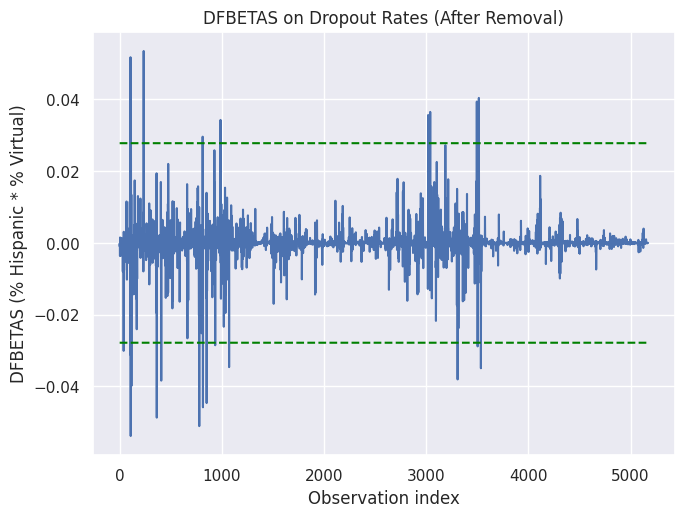

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_his_virtual.csv').drop_his_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hispanic * % Virtual)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_his_vir_after.png")
files.download("drop_his_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

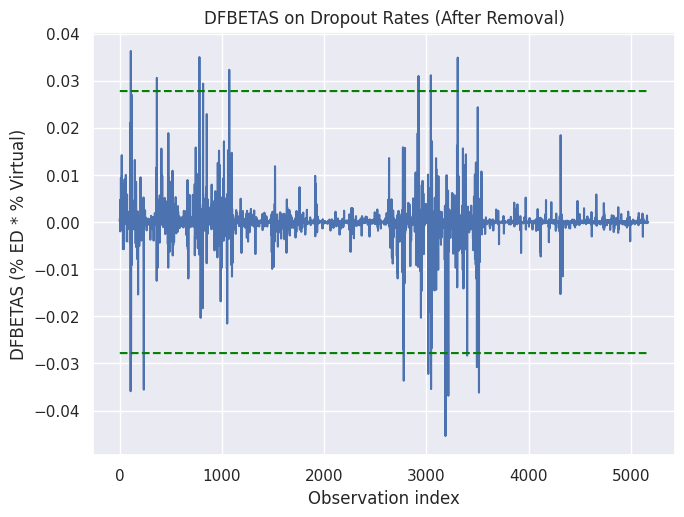

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_ed_virtual.csv').drop_ed_virtual)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% ED * % Virtual)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_ed_vir_after.png")
files.download("drop_ed_vir_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

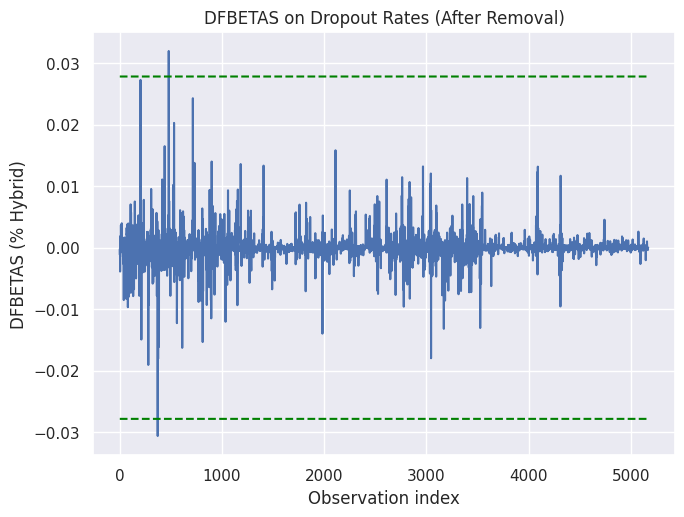

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_hybrid.csv').drop_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hybrid)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_hy_after.png")
files.download("drop_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

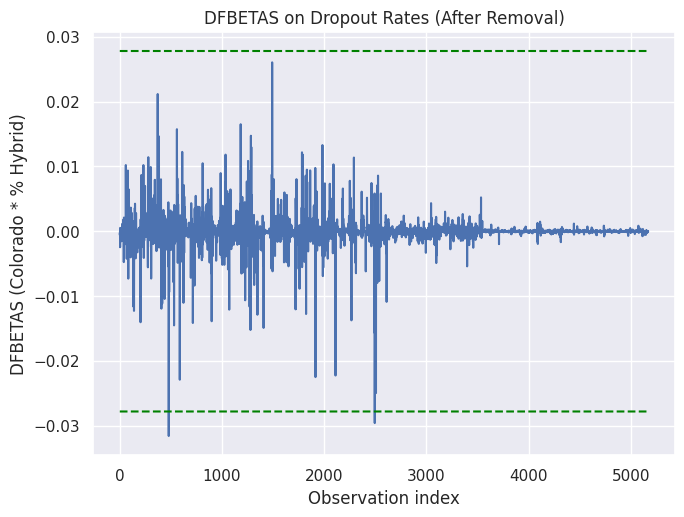

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_co_hybrid.csv').drop_co_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Colorado * % Hybrid)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_co_hy_after.png")
files.download("drop_co_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

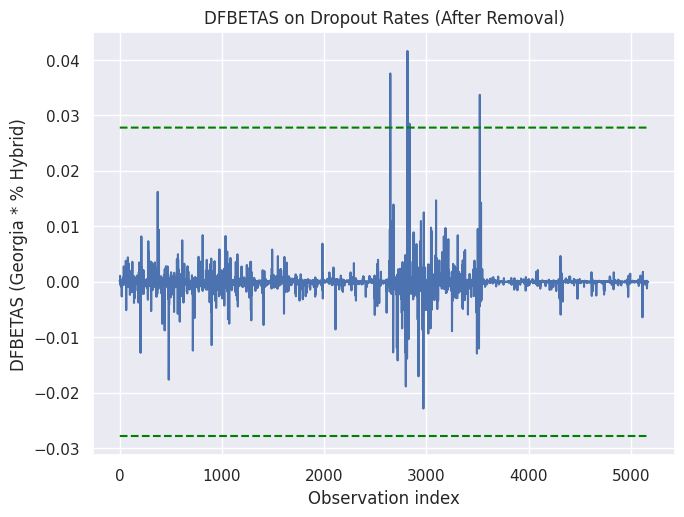

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_ga_hybrid.csv').drop_ga_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Georgia * % Hybrid)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_ga_hy_after.png")
files.download("drop_ga_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

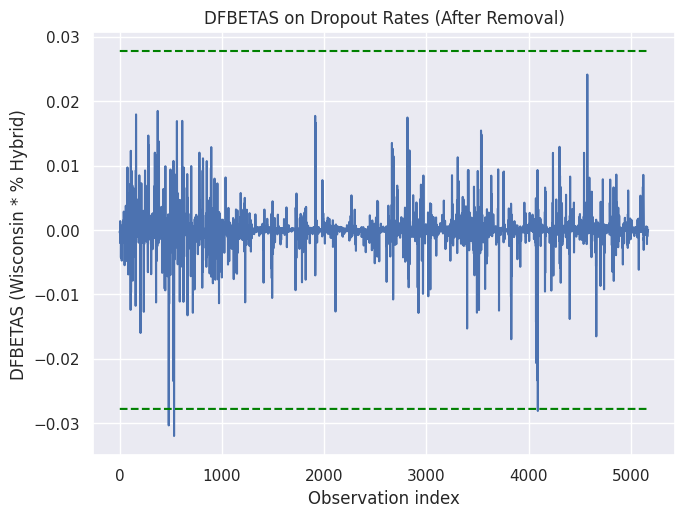

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_wi_hybrid.csv').drop_wi_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (Wisconsin * % Hybrid)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_wi_hy_after.png")
files.download("drop_wi_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

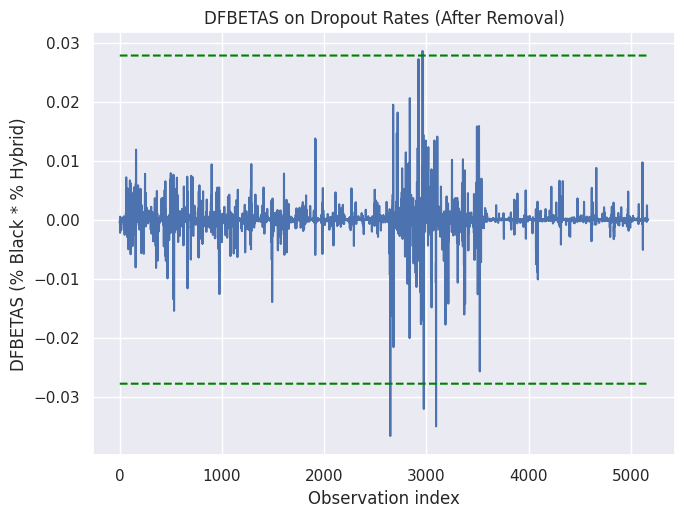

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_black_hybrid.csv').drop_black_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Black * % Hybrid)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_black_hy_after.png")
files.download("drop_black_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

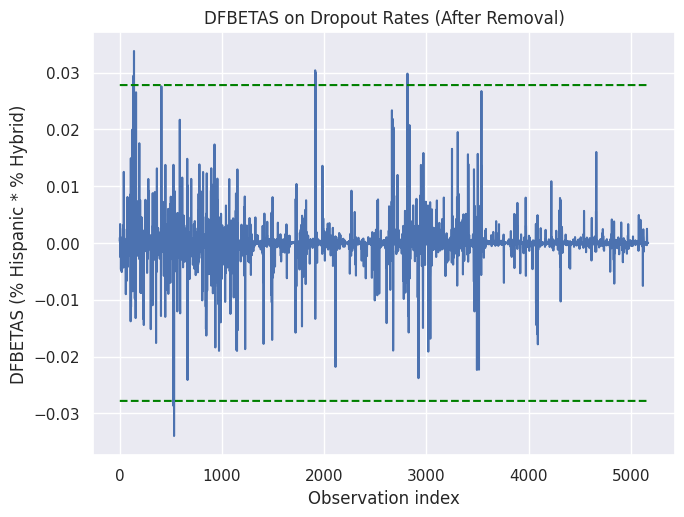

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_his_hybrid.csv').drop_his_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% Hispanic * % Hybrid)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_his_hy_after.png")
files.download("drop_his_hy_after.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

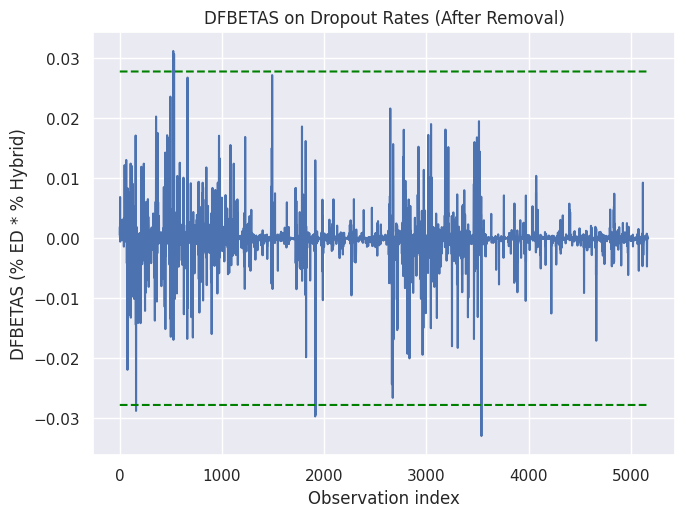

In [ ]:
sns.set(rc={'figure.figsize':(7.5,5.5)})
sns.lineplot(x = range(data.shape[0]), y = pd.read_csv('drop_ed_hybrid.csv').drop_ed_hybrid)
plt.xlabel('Observation index')
plt.ylabel("DFBETAS (% ED * % Hybrid)")
plt.title("DFBETAS on Dropout Rates (After Removal)")

ax = sns.lineplot(x = range(data.shape[0]), y = critical_val, color = 'green')
sns.lineplot(x = range(data.shape[0]), y = -critical_val, color = 'green')
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("--")

plt.savefig("drop_ed_hy_after.png")
files.download("drop_ed_hy_after.png")